# Import packages

In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys

project_folder = '/Users/dusiyi/Documents/Multifirefly-Project'
os.chdir(project_folder)
sys.path.append(os.path.join(project_folder, 'multiff_analysis', 'methods'))

from data_wrangling import specific_utils, process_monkey_information
from pattern_discovery import pattern_by_trials, pattern_by_trials, cluster_analysis, organize_patterns_and_features
from visualization.matplotlib_tools import plot_behaviors_utils
from non_behavioral_analysis.neural_data_analysis.get_neural_data import neural_data_processing
from non_behavioral_analysis.neural_data_analysis.visualize_neural_data import plot_neural_data, plot_modeling_result
from non_behavioral_analysis.neural_data_analysis.model_neural_data import cca_class, pgam_class, neural_data_modeling, reduce_multicollinearity
from non_behavioral_analysis.neural_data_analysis.neural_vs_behavioral import prep_monkey_data, prep_target_data, neural_vs_behavioral_class
from non_behavioral_analysis.neural_data_analysis.planning_neural import planning_neural_class, planning_neural_utils
from non_behavioral_analysis.neural_data_analysis.decode_targets import behav_features_to_keep, decode_target_class

import sys
import math
import gc
import subprocess
from pathlib import Path
from importlib import reload

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from scipy import linalg, interpolate
from scipy.signal import fftconvolve
from scipy.io import loadmat
from scipy import sparse
import torch
from numpy import pi

# Machine Learning imports
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.multivariate.cancorr import CanCorr

# Neuroscience specific imports
import neo
import rcca

plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
print("done")

%load_ext autoreload
%autoreload 2

done
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Basic data

In [3]:
## Retrieve monkey data
PLAYER = "monkey"
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330"
data_item = neural_vs_behavioral_class.NeuralVsBehavioralClass(raw_data_folder_path=raw_data_folder_path)
data_item.retrieve_or_make_monkey_data()
data_item.make_or_retrieve_ff_dataframe(exists_ok=True)
data_item.find_patterns()
data_item.make_PlotTrials_args()

monkey_information = data_item.monkey_information
ff_dataframe = data_item.ff_dataframe

ff_life_sorted = data_item.ff_life_sorted
ff_real_position_sorted = data_item.ff_real_position_sorted
ff_believed_position_sorted = data_item.ff_believed_position_sorted
cluster_around_target_indices = data_item.cluster_around_target_indices
ff_caught_T_new = data_item.ff_caught_T_new
caught_ff_num = len(ff_caught_T_new)
ff_flash_sorted = data_item.ff_flash_sorted
ff_flash_end_sorted = data_item.ff_flash_end_sorted
max_point_index = data_item.max_point_index
min_point_index = data_item.min_point_index




data_item.make_or_retrieve_target_clust_last_vis_df()
target_clust_last_vis_df = data_item.target_clust_last_vis_df
target_clust_last_vis_df['ff_index'] = target_clust_last_vis_df['target_index']


PlotTrials_args = (monkey_information, ff_dataframe, ff_life_sorted, ff_real_position_sorted, ff_believed_position_sorted, cluster_around_target_indices, ff_caught_T_new)


plot_polar_args = (monkey_information,
                    ff_dataframe, 
                    ff_life_sorted,
                    ff_real_position_sorted,
                    ff_caught_T_new,
                    ff_flash_sorted,)


trial_total_num = 2
PLAYER = "monkey"

Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Bruno/data_0330/ff_dataframe.h5
When take out monkey subset for GUAT, 643 clusters out of 856 are too close to the target or the last target. Those clusters are filtered out.
The number of new trials that are used to separate stop clusters is 1338
Retrieved target_clust_last_vis_df


# get neural data (as in other notebooks)

In [4]:
data_item = neural_vs_behavioral_class.NeuralVsBehavioralClass(raw_data_folder_path=raw_data_folder_path,
                                                               one_behav_idx_per_bin=True)
data_item.streamline_preparing_neural_and_behavioral_data()

Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Bruno/data_0330/ff_dataframe.h5
When take out monkey subset for GUAT, 643 clusters out of 856 are too close to the target or the last target. Those clusters are filtered out.
The number of new trials that are used to separate stop clusters is 1338
Retrieved all_trial_patterns
Retrieved pattern_frequencies
Retrieved all_trial_features
Retrieved feature_statistics
Retrieved scatter_around_target_df
Retrieved target_df
Retrieved target_cluster_df


In [5]:
ref_point_mode='distance'
ref_point_value=-150

normalize = False
eliminate_outliers = False
use_curvature_to_ff_center = False
curv_of_traj_mode = 'distance'
window_for_curv_of_traj=[-25, 25]

# experiment

pn = planning_neural_class.PlanningAndNeural(raw_data_folder_path=raw_data_folder_path,
                                             one_behav_idx_per_bin=False)
pn.streamline_organizing_info(ref_point_mode='time after cur ff visible', ref_point_value=0.1, 
                               curv_of_traj_mode=curv_of_traj_mode, window_for_curv_of_traj=window_for_curv_of_traj, truncate_curv_of_traj_by_time_of_capture=True,
                               use_curvature_to_ff_center=use_curvature_to_ff_center,  eliminate_outliers=eliminate_outliers)
pn.retrieve_neural_data()


pn.get_all_planning_info()


Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Removed 0 rows out of 768 rows where cur_ff was not visible bbas or nxt_ff was not visible both bbas and bsans
shared_stops_near_ff_df has 768 rows
Retrieving shared_stops_near_ff_df succeeded
Retrieving stop_0_1_window_-50cm_0cm from all_monkey_data/planning/monkey_Bruno/data_0330/diff_in_curv_df/norm_opt_arc/test/stop_0_1_window_-50cm_0cm succeeded
Retrieving Bruno_stop_0_1 from all_monkey_data/planning/monkey_Bruno/data_0330/heading_info_df/norm_opt_arc/test/Bruno_stop_0_1 succeeded


/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/methods/non_behavioral_analysis/neural_data_analysis/planning_neural/planning_neural_class.py:34: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  self.bin_info = self.bin_info.merge(self.monkey_info_in_bins.drop(


,point_index,nxt_ff_angle,nxt_ff_distance,nxt_arc_curv,nxt_opt_arc_curv,nxt_opt_arc_dheading,time_rel_to_stop,traj_curv,cur_ff_angle,cur_ff_distance,cur_arc_curv,cur_opt_arc_curv,cur_opt_arc_dheading,stop_point_index,bin,angle_from_m_before_stop_to_cur_ff,angle_from_m_before_stop_to_nxt_ff,angle_from_cur_ff_landing_to_nxt_ff
0,2390,-0.05136,294.46944,-0.00035,-0.00069,-0.20359,-1.87570,-0.00623,-0.12777,212.48021,-0.00120,-0.00186,-0.39150,2503,158,-0.55642,0.05417,-0.04811
1,2405,0.15190,249.19730,0.00121,0.00074,0.18436,-1.62672,-0.00175,0.06022,167.11417,0.00072,0.00000,0.00017,2503,159,-0.55642,0.05417,-0.04811
2,2420,0.14997,200.51246,0.00149,0.00223,0.44246,-1.37771,0.00284,0.04635,117.84479,0.00079,0.00284,0.32780,2503,160,-0.55642,0.05417,-0.04811
3,2435,0.05814,170.92792,0.00068,0.00171,0.28839,-1.12870,0.00356,-0.06492,88.10510,-0.00147,-0.00000,-0.00009,2503,161,-0.55642,0.05417,-0.04811
4,2450,0.03831,170.37712,0.00045,0.00149,0.25017,-0.87972,0.00356,-0.08539,87.55547,-0.00195,-0.00000,-0.00009,2503,162,-0.55642,0.05417,-0.04811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,218120,-0.34917,171.03916,-0.00400,-0.00303,-0.53500,0.58095,-0.00067,-0.55596,9.11887,-0.00067,-0.00067,-0.00518,218083,14332,-0.52015,-0.34500,-0.53120
4963,218136,-0.26112,142.34491,-0.00363,-0.00507,-0.70795,0.84659,-0.00659,NaN,NaN,NaN,NaN,NaN,218083,14333,-0.52015,-0.34500,-0.53120
4964,218151,-0.01454,99.72074,-0.00029,-0.00334,-0.32319,1.09554,-0.00405,NaN,NaN,NaN,NaN,NaN,218083,14334,-0.52015,-0.34500,-0.53120
4965,218166,0.09003,50.72239,0.00354,0.00000,0.00005,1.34457,-0.00006,NaN,NaN,NaN,NaN,NaN,218083,14335,-0.52015,-0.34500,-0.53120


# get behavioral data (new version)

In [41]:
decoder = decode_target_class.DecodeTargetClass(raw_data_folder_path=raw_data_folder_path,
                                                               bin_width=0.1, window_width=0.25)
decoder.streamline_making_behav_data()


Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Bruno/data_0330/ff_dataframe.h5
Window width changed from 0.25 to 0.30000000000000004 to make it odd
Retrieved target_df


# !! take out chunks of time

# retrieve chunks of time of no cluster around target

In [7]:
exists_ok = True
data_item.make_or_retrieve_target_clust_last_vis_df(exists_ok=exists_ok)
data_item.make_or_retrieve_target_last_vis_df(exists_ok=True)

data_item.target_clust_last_vis_df['nearby_vis_ff_indices'] = data_item.target_clust_last_vis_df['nearby_vis_ff_indices'].apply(
    lambda x: [int(i) for i in x.strip('[]').split(',') if i.strip().isdigit()])

data_item.target_clust_last_vis_df['num_nearby_vis_ff'] = data_item.target_clust_last_vis_df['nearby_vis_ff_indices'].apply(lambda x: len(x))

# add ff_caught_time and ff_caught_point_index
data_item.target_clust_last_vis_df['ff_caught_time'] = data_item.ff_caught_T_new[data_item.target_clust_last_vis_df['target_index'].values]
data_item.target_clust_last_vis_df['ff_caught_point_index'] = np.searchsorted(data_item.monkey_information['time'], data_item.target_clust_last_vis_df['ff_caught_time'].values)

Retrieved target_clust_last_vis_df
Retrieved target_last_vis_df


In [8]:
clust_sub = data_item.target_clust_last_vis_df[data_item.target_clust_last_vis_df['num_nearby_vis_ff'] == 1]
# print percentage of clust_sub
print("Percentage of targets not in a visible cluster out of all targets", len(clust_sub) / len(data_item.target_clust_last_vis_df) * 100)

Percentage of targets not in a visible cluster out of all targets 66.4424514200299


In [9]:
clust_sub

,target_index,last_vis_point_index,last_vis_ff_index,nearby_vis_ff_indices,time_since_last_vis,last_vis_dist,last_vis_cum_dist,last_vis_ang,last_vis_ang_to_bndry,last_vis_target_dist,last_vis_target_ang,last_vis_target_ang_to_bndry,abs_last_vis_ang,abs_last_vis_ang_to_bndry,abs_last_vis_target_ang,abs_last_vis_target_ang_to_bndry,nearby_alive_ff_indices,num_nearby_vis_ff,ff_caught_time,ff_caught_point_index
0,0,1516,288,[288],0.44818,33.91286,45.82561,0.88170,0.58238,24.30098,0.56223,0.13812,0.88170,0.58238,0.56223,0.13812,[ 0 288],1,25.70465,1543
1,1,1913,1,[1],0.53116,75.84658,87.94081,-0.06564,-0.00000,0.00000,-0.06564,0.00000,0.06564,0.00000,0.06564,0.00000,[1],1,32.34454,1945
2,2,1989,2,[2],0.63087,87.14853,99.49946,-0.05724,-0.00000,0.00000,-0.05724,0.00000,0.05724,0.00000,0.05724,0.00000,[2],1,33.67256,2027
3,3,2302,3,[3],0.68062,83.59294,90.32461,0.45030,0.33039,0.00000,0.45030,0.00000,0.45030,0.33039,0.45030,0.00000,[3],1,38.88428,2343
4,4,2474,4,[4],0.48124,61.22246,46.38383,-0.20824,-0.04417,0.00000,-0.20824,0.00000,0.20824,0.04417,0.20824,0.00000,[4],1,41.50749,2503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,1328,217267,1328,[1328],0.58097,103.85624,93.06060,0.10958,0.01314,0.00000,0.10958,0.00000,0.10958,0.01314,0.10958,0.00000,[1328],1,3569.68789,217302
1329,1329,217384,1329,[1329],1.16203,196.58692,207.06213,0.13848,0.08759,0.00000,0.13848,0.00000,0.13848,0.08759,0.13848,0.00000,[1329],1,3572.17792,217454
1330,1330,217517,1330,[1330],1.59328,182.41317,194.84056,0.00840,0.00000,0.00000,0.00840,0.00000,0.00840,0.00000,0.00840,0.00000,[1330],1,3574.78401,217613
1334,1334,218273,1334,[1334],2.02509,238.98133,236.83568,-0.01878,-0.00000,0.00000,-0.01878,0.00000,0.01878,0.00000,0.01878,0.00000,[1334],1,3587.64874,218395


In [23]:
point_index_list = []
for index, row in clust_sub.iterrows():
    point_index_list.extend(range(row['last_vis_point_index'], row['ff_caught_point_index']))
decoder.behav_data_sub = decoder.behav_data[decoder.behav_data['point_index'].isin(point_index_list)]
org_len = len(decoder.behav_data_sub)
new_len = len(decoder.behav_data)
print(f'{org_len} rows of {new_len} rows ({round(org_len/new_len * 100, 1)}%) of behav_data are preserved after taking out chunks between target last-seen time and capture time')
    

38535 rows of 179180 rows (21.5%) of behav_data are preserved after taking out chunks between target last-seen time and capture time


In [ ]:
# should i actually align each section, as if they are trials???
# maybe i can try both that and continuous time... both can shed light on different behavioral variables
# but for aligning trials, it may require alignment or warping since trial durations vary.

# btw, what does it mean stitch data?

# also, what does it look like to use RNN to model it?
# I thought about the paper that Noah presented on


# btw.......IME

# columns from monkey_information to keep

In [24]:
data_item.y_var = decoder.behav_data_sub[behav_features_to_keep.shared_columns_to_keep]
#decoder.behav_data[behav_features_to_keep.extra_columns_for_stitched_time]


# Get data for modeling

In [43]:
# # drop rows with NA in all_planning_info and print the percentage of rows dropped
# all_planning_info2 = pn.all_planning_info.drop(columns=columns_to_drop, errors='ignore').copy()
# all_planning_info2 = all_planning_info2.dropna().copy()
# all_planning_info2.drop(columns={'stop_point_index', 'point_index'}, inplace=True)
# print("Percentage of rows dropped: ", 1 - all_planning_info2.shape[0] / len(pn.all_planning_info))
# data_item.y_var = all_planning_info2.copy()

_, decoder.binned_spikes_df = neural_data_processing.prepare_binned_spikes_matrix_and_df(decoder.all_binned_spikes)

decoder.binned_spikes_df['bin'] = np.arange(decoder.binned_spikes_df.shape[0])
neural_bins_sub2 = decoder.binned_spikes_df[decoder.binned_spikes_df['bin'].isin(decoder.behav_data['bin'].values)]
data_item.x_var = neural_bins_sub2.drop(columns=['bin'])

In [45]:
bins = decoder.binned_spikes_df

# Calculate percentage of non-zero rows for each column
non_zero_percentages = (bins != 0).mean() * 100

# Create a DataFrame with the results
non_zero_df = pd.DataFrame({
    'Column': non_zero_percentages.index,
    'Percent_Non_Zero': non_zero_percentages.values
})

# Sort by percentage in descending order
non_zero_df = non_zero_df.sort_values('Percent_Non_Zero', ascending=False)

print("Percentage of non-zero values in each column:")
print(non_zero_df)


Percentage of non-zero values in each column:
     Column  Percent_Non_Zero
16      bin          99.99793
4    unit_4          58.29066
3    unit_3          41.51237
7    unit_7          41.38174
2    unit_2          22.52172
12  unit_12          21.35852
9    unit_9          18.26702
1    unit_1          16.74926
10  unit_10          12.46968
0    unit_0          12.17525
15  unit_15           7.93299
14  unit_14           6.60598
8    unit_8           5.49669
6    unit_6           3.20139
5    unit_5           3.19517
11  unit_11           0.36493
13  unit_13           0.20112


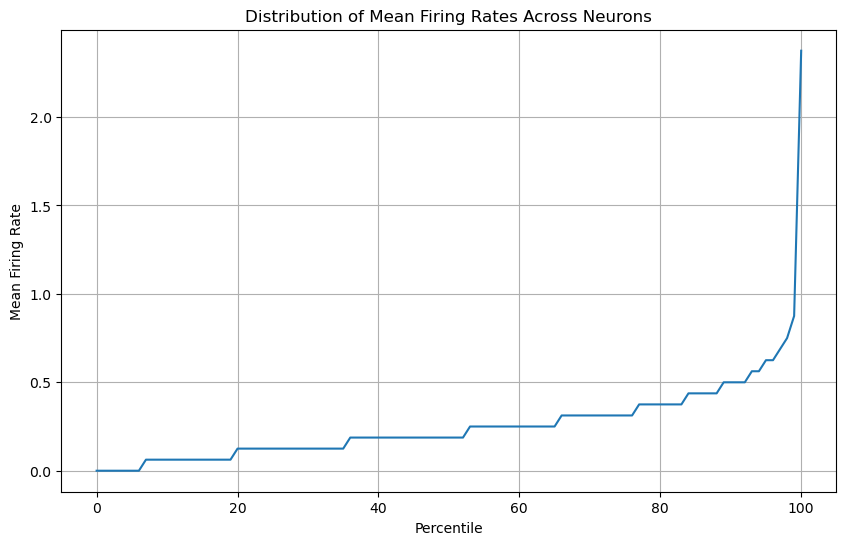

In [47]:
bins.drop(columns='bin').mean(axis=1).describe()

# plot value of each percentile
# Get mean firing rates across neurons
mean_rates = bins.drop(columns='bin').mean(axis=1)

# Calculate percentiles from 0 to 100
percentiles = np.arange(0, 101, 1)
percentile_values = np.percentile(mean_rates, percentiles)

# Create plot
plt.figure(figsize=(10, 6))
plt.plot(percentiles, percentile_values)
plt.xlabel('Percentile')
plt.ylabel('Mean Firing Rate')
plt.title('Distribution of Mean Firing Rates Across Neurons')
plt.grid(True)
plt.show()


In [48]:
trial_lengths = decoder.behav_data_sub.groupby('target_index').count()

AttributeError: 'DecodeTargetClass' object has no attribute 'behav_data_sub'

In [ ]:
trial_lengths

In [ ]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.DataFrame(pn.all_planning_info.isnull().sum())

In [ ]:
print('data_item.x_var.shape:', data_item.x_var.shape)
print('binned_spikes_df.shape:', pn.binned_spikes_df.shape)
print('data_item.y_var.shape:', data_item.y_var.shape)

data_item.x_var.shape: (675, 86)
binned_spikes_df.shape: (14396, 87)
data_item.y_var.shape: (675, 13)


In [ ]:
# conduct linear regression on X and y
plt.rcParams["figure.figsize"] = (20, 10)
bins_to_plot = range(all_planning_info2.bin.max())
for i, column in enumerate(data_item.y_var.columns):
    plot_neural_data.plot_regression(data_item.y_var, column, data_item.x_var, bins_to_plot=None, min_r_squared_to_plot=0.3)
    # if i == 3:
    #     break

### VIF

In [15]:
vif = pd.DataFrame({
    "vif": [variance_inflation_factor(data_item.y_var.values, i) for i in range(data_item.y_var.shape[1])],
    "features": data_item.y_var.columns
}).sort_values(by='vif', ascending=False).round(1)
vif.reset_index(drop=False, inplace=True)

vif

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
specific_columns = vif.iloc[:15].features.values
specific_columns

array(['nxt_ff_angle', 'cur_ff_distance', 'time_rel_to_stop',
       'cur_opt_arc_curv', 'nxt_opt_arc_curv', 'cur_opt_arc_dheading',
       'nxt_ff_distance', 'traj_curv',
       'angle_from_m_before_stop_to_nxt_ff', 'cur_ff_angle', 'bin',
       'cur_arc_curv', 'angle_from_m_before_stop_to_cur_ff'], dtype=object)

In [ ]:
fff = [feature for feature in vif.features.tolist() if ('nxt' in feature) and ('cur' in feature)]
fff

['nxt_opt_arc_curv']

In [ ]:
fff = [feature for feature in vif.features.tolist() if ('nxt_arc_' in feature) or ('nxt_opt' in feature)]
fff

['nxt_opt_arc_curv']

In [ ]:
 specific_columns = ['cur_ff_distance',
 'cur_ff_angle',
 'cur_opt_arc_dheading',
 'cur_arc_curv']

 specific_columns = ['cur_ff_angle',
 'cur_ff_distance',
 'cur_opt_arc_dheading',
 'cur_opt_arc_curv',
 'cur_arc_curv']

In [ ]:
 specific_columns = ['nxt_ff_angle',
 'nxt_ff_distance',
 'nxt_opt_arc_dheading',
 'nxt_opt_arc_curv',
 'nxt_arc_curv']

In [ ]:
fff = [feature for feature in vif.features.tolist() if ('nxt' in feature) & ('first_seen' not in feature) & ('last_seen' in feature)]
fff

[]

### Correlations between features

In [ ]:
columns_to_drop = ['nxt_opt_arc_dheading',
    'nxt_arc_curv',
  'angle_from_cur_ff_landing_to_nxt_ff',
]
  

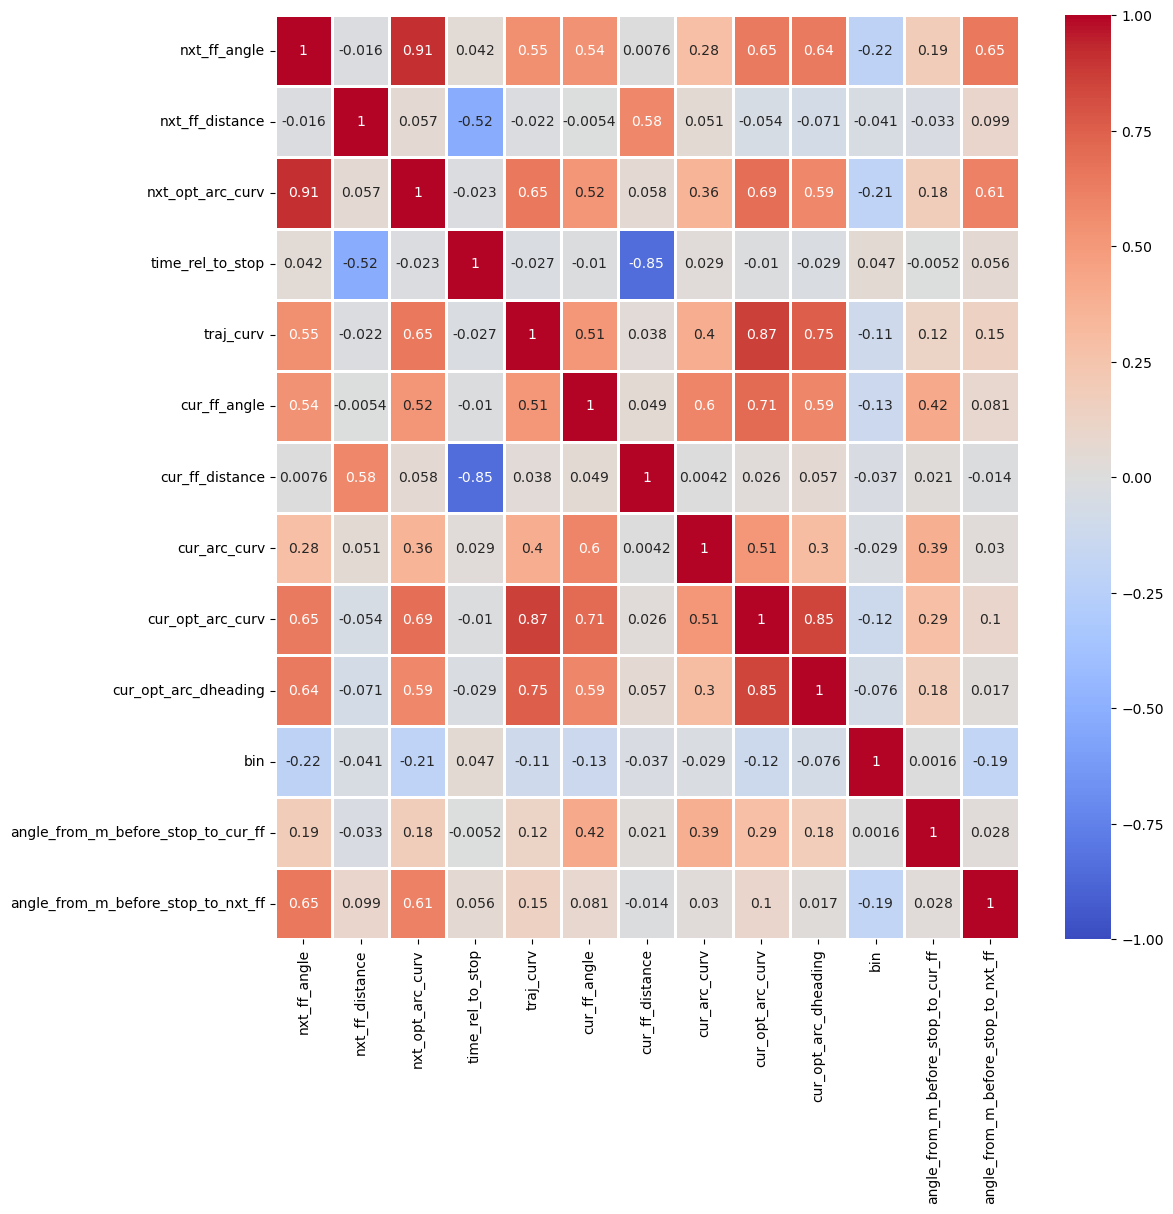

In [ ]:
# calculate the correlation coefficient among the columns with VIF > 5
# specific_columns = vif[vif["vif"] > 5].features.values
specific_columns = data_item.y_var.columns
corr_coeff = data_item.y_var[specific_columns].corr()
#plt.figure(figsize = (6, 6))
plt.figure(figsize = (12, 12))
sns.heatmap(corr_coeff, cmap='coolwarm', annot=True, linewidths=1, vmin=-1)
plt.show()

# CCA

https://medium.com/@pozdrawiamzuzanna/canonical-correlation-analysis-simple-explanation-and-python-example-a5b8e97648d2

## No lagging

In [ ]:
cca_no_lag = cca_class.CCAclass(X1=data_item.x_var, X2=data_item.y_var, lagging_included=False)

Training CCA, kernel = None, regularization = 0.0000, 10 components
Canonical Correlation Per Component Pair: [0.75528 0.52116 0.48135 0.43971 0.41816 0.40527 0.39529 0.35391 0.33799
 0.31412]
% Shared Variance: [0.57045 0.27161 0.2317  0.19335 0.17486 0.16425 0.15625 0.12525 0.11424
 0.09867]


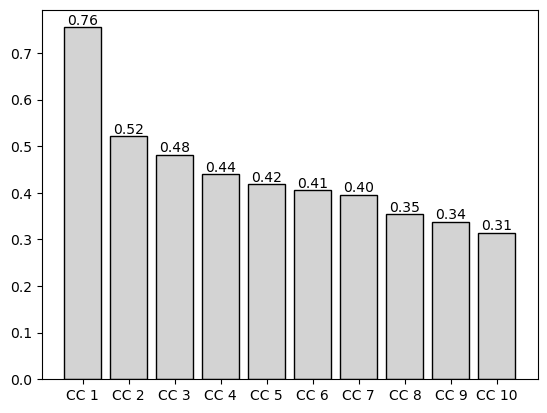

In [ ]:
cca_no_lag.conduct_cca()
cca_inst = cca_no_lag

## loadings

### neurons

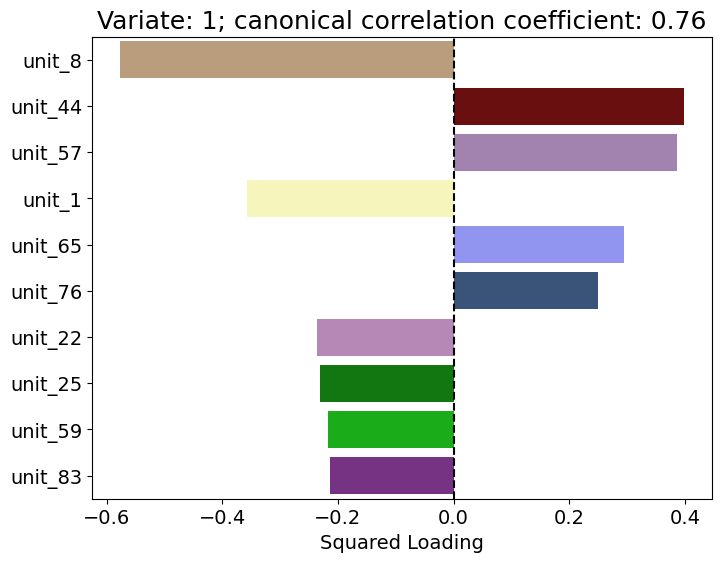

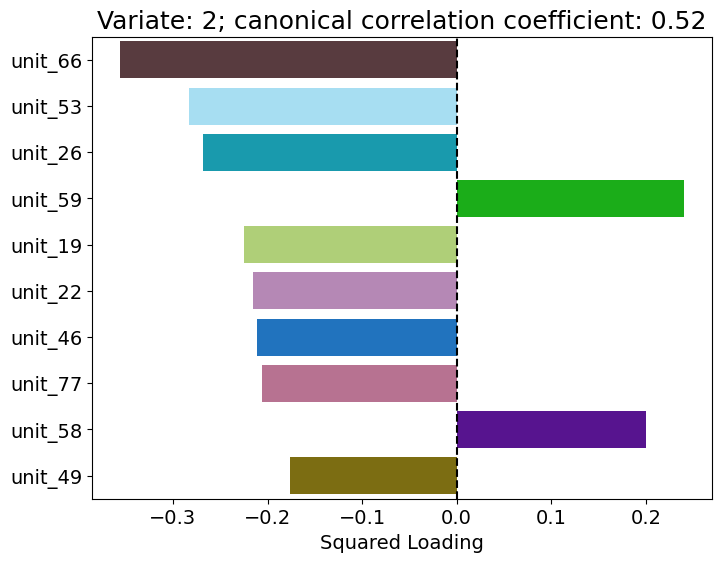

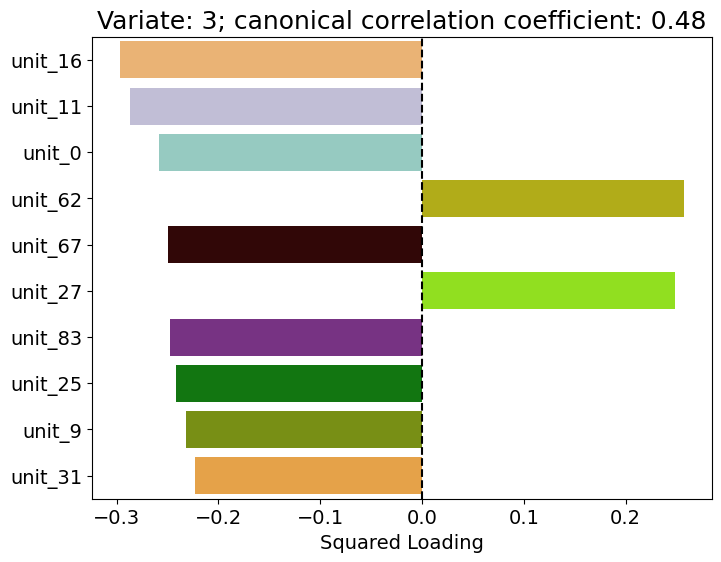

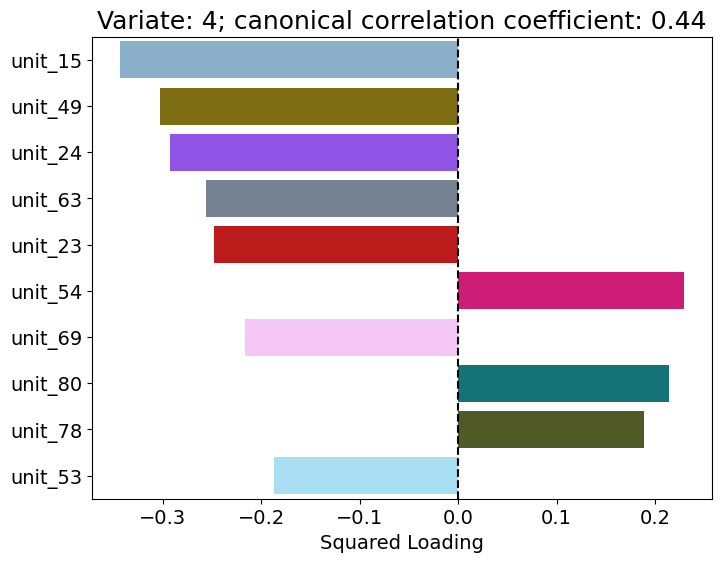

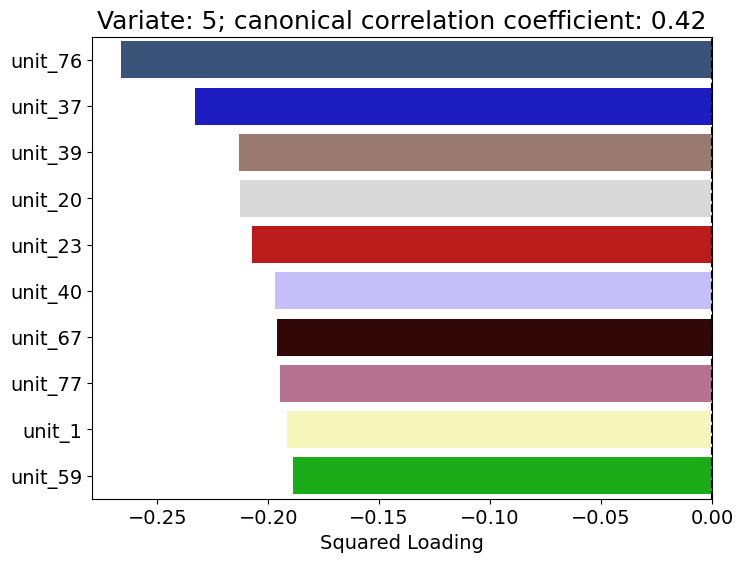

In [ ]:
cca_inst.plot_ranked_loadings(X1_or_X2='X1', squared=False)

### behavior

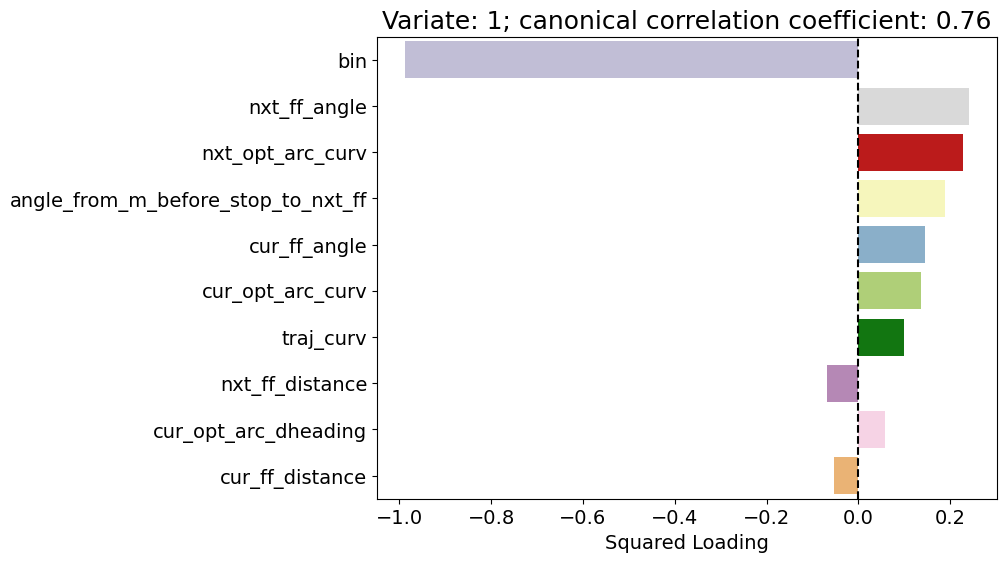

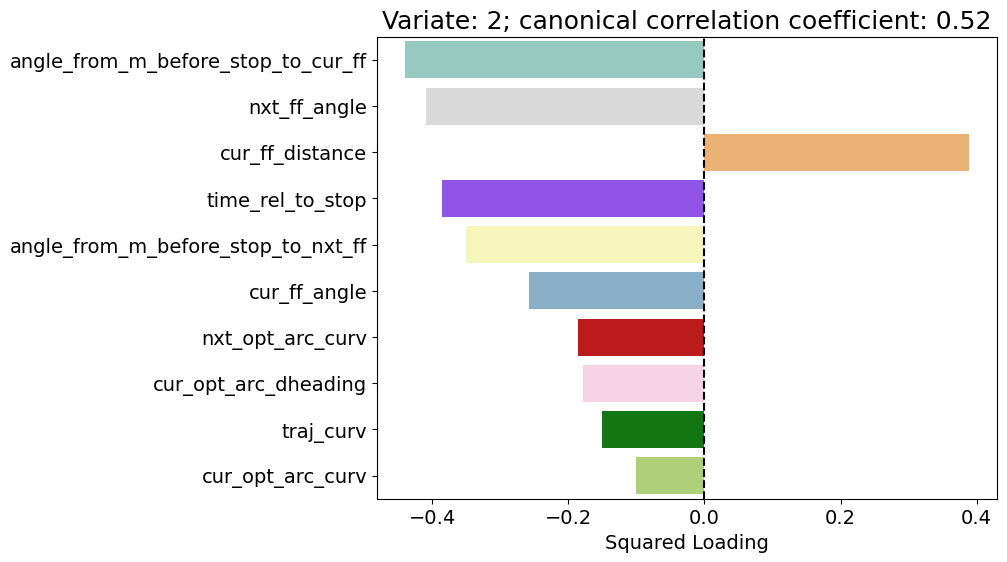

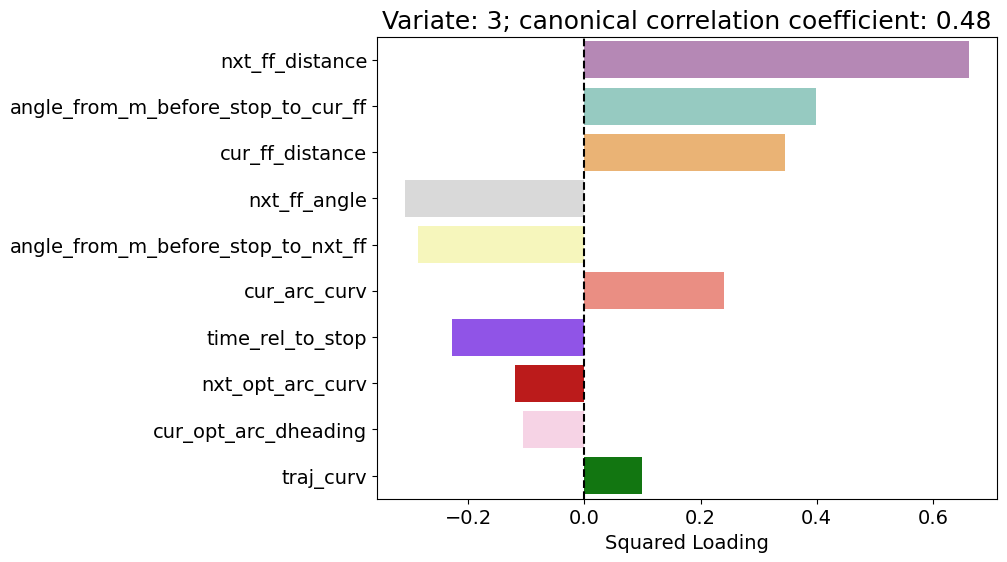

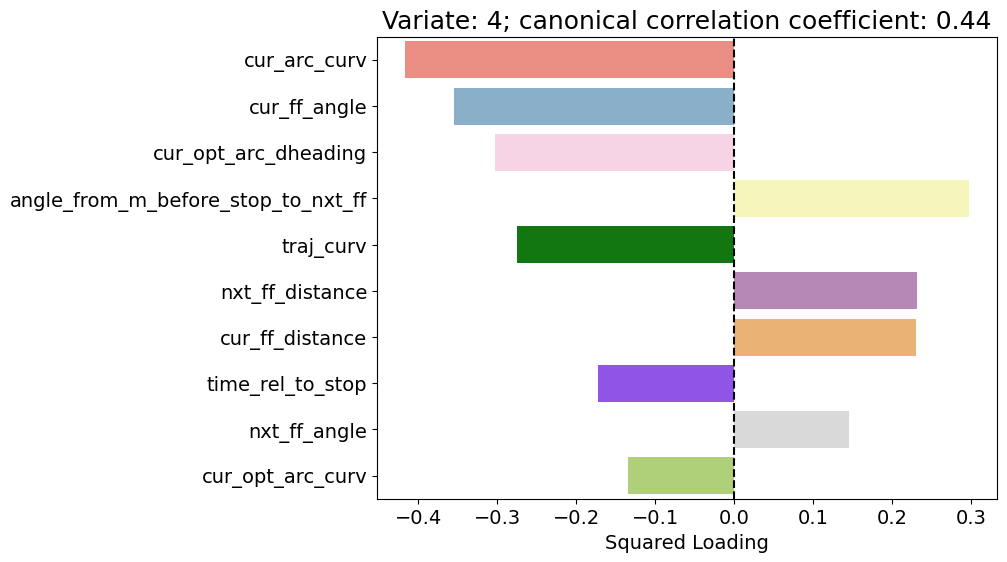

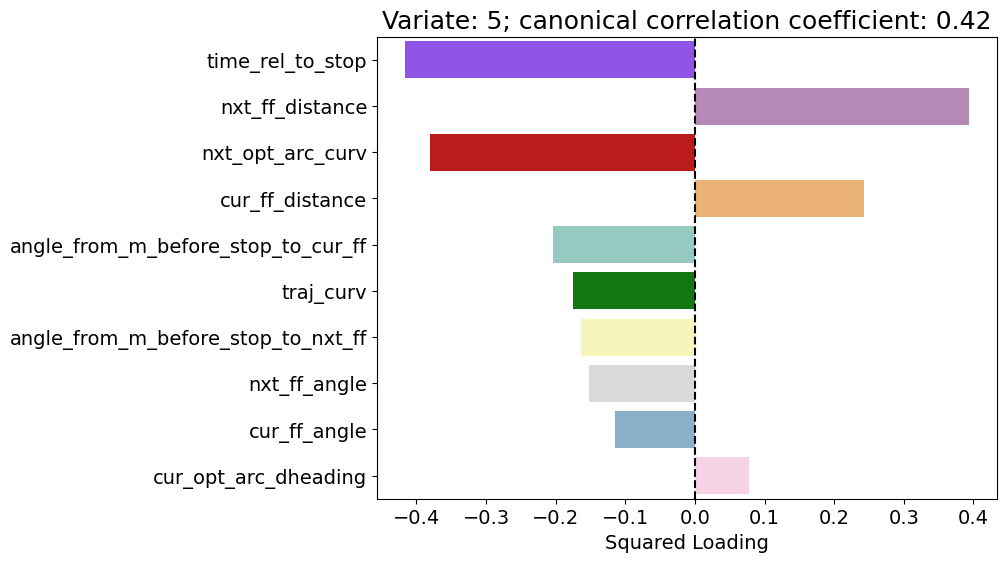

In [ ]:
cca_inst.plot_ranked_loadings(X1_or_X2='X2', squared=False)

## squared loadings

### neurons

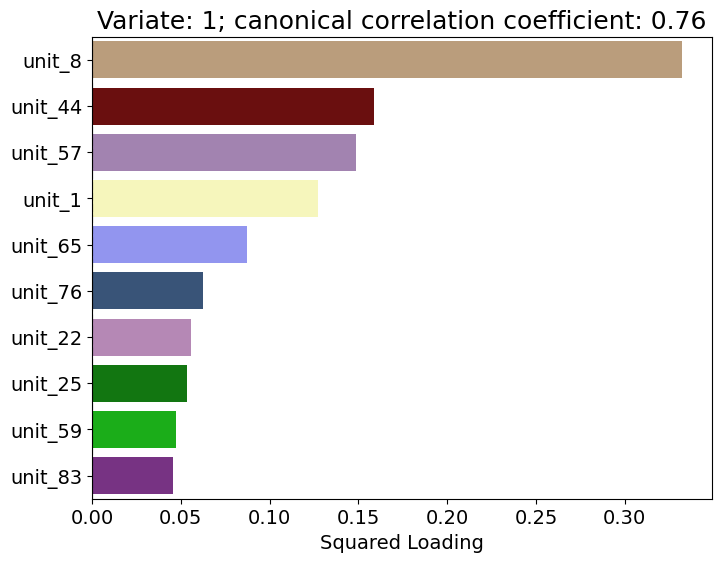

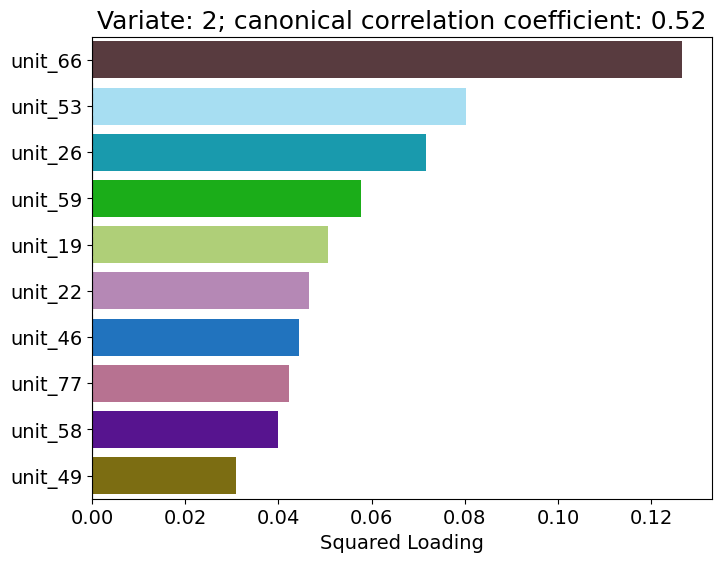

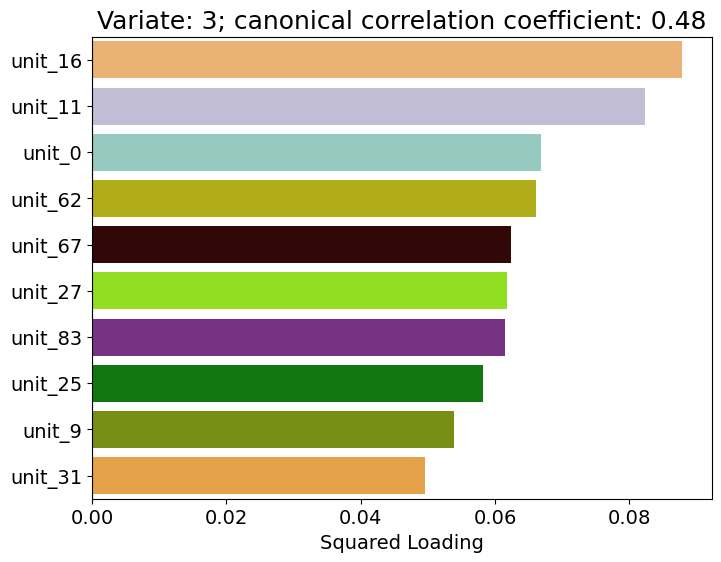

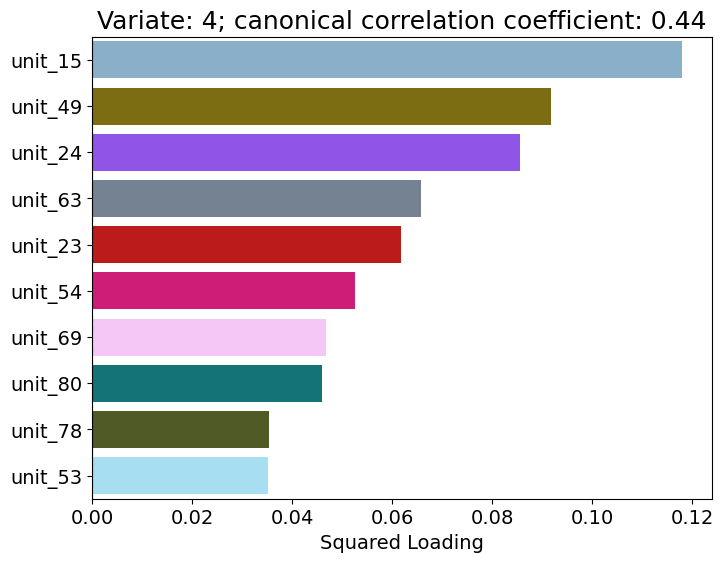

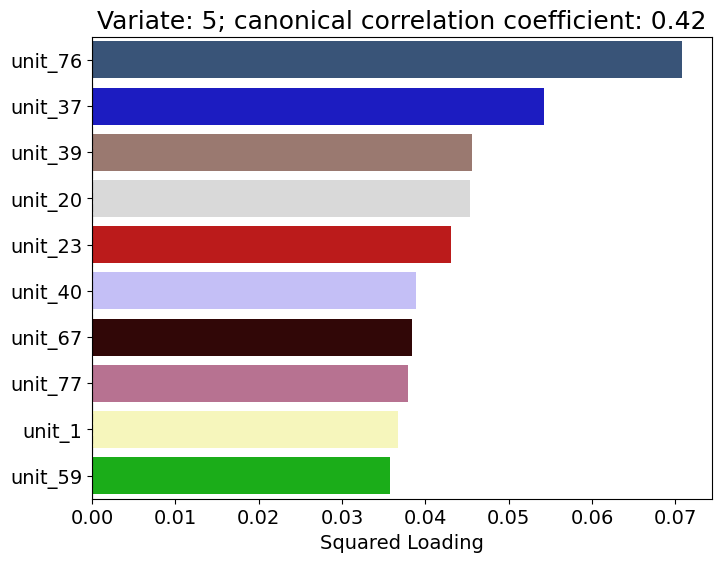

In [ ]:
cca_inst.plot_ranked_loadings(X1_or_X2='X1')

### behavior

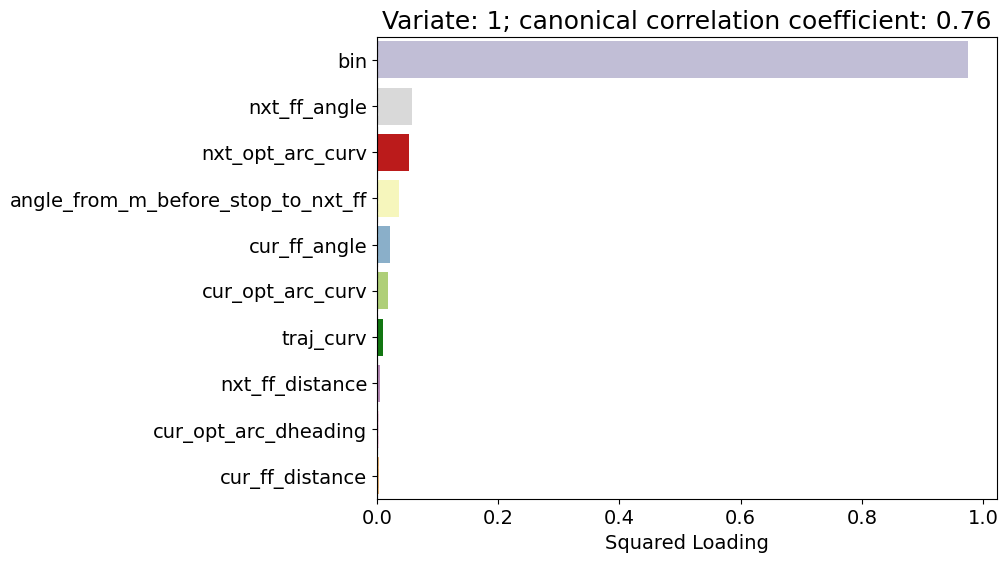

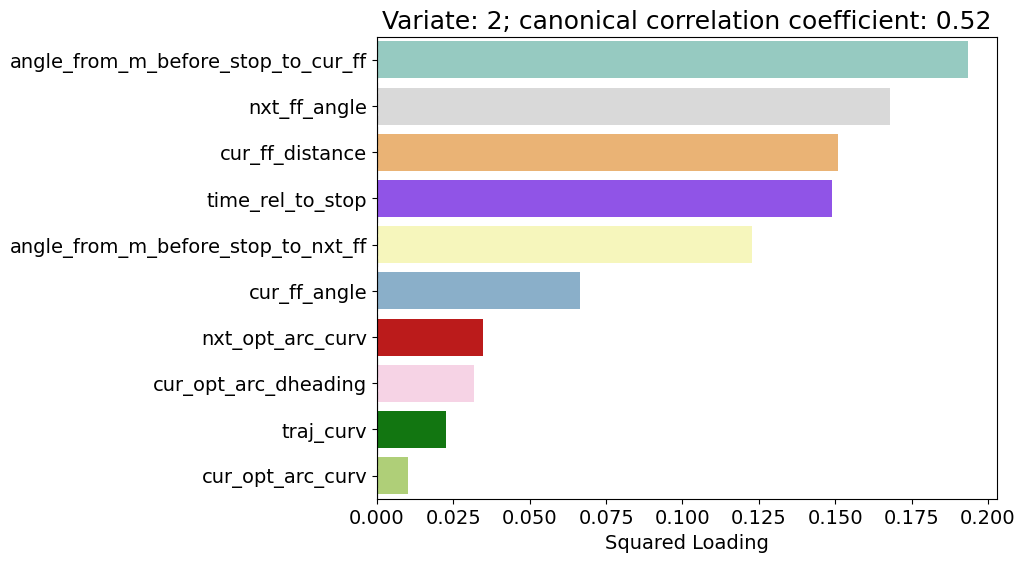

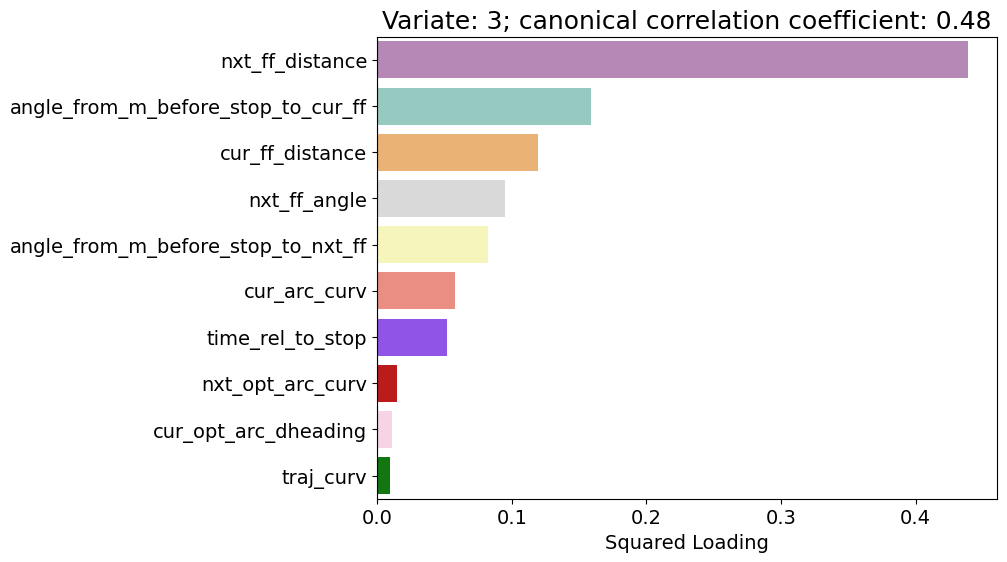

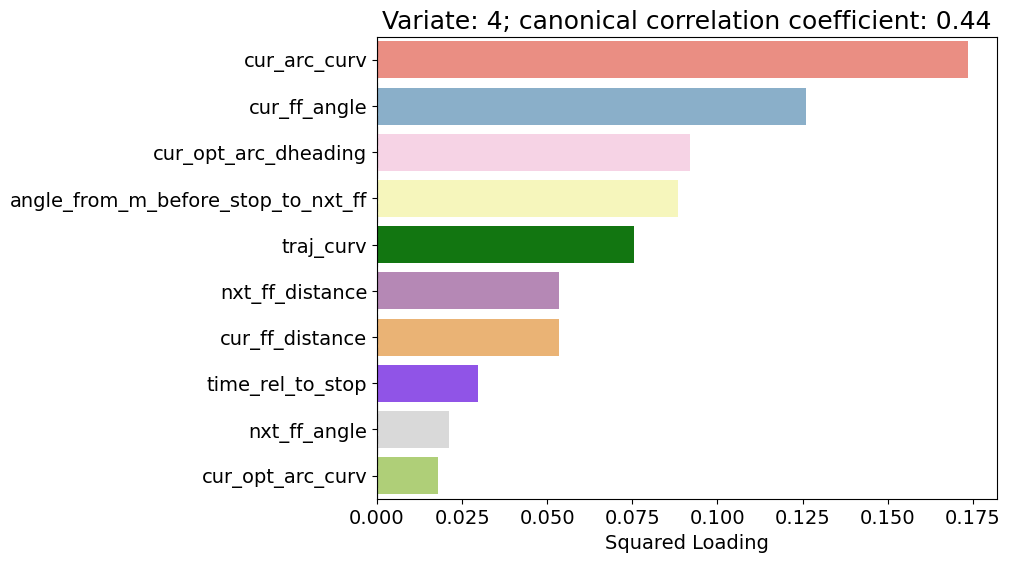

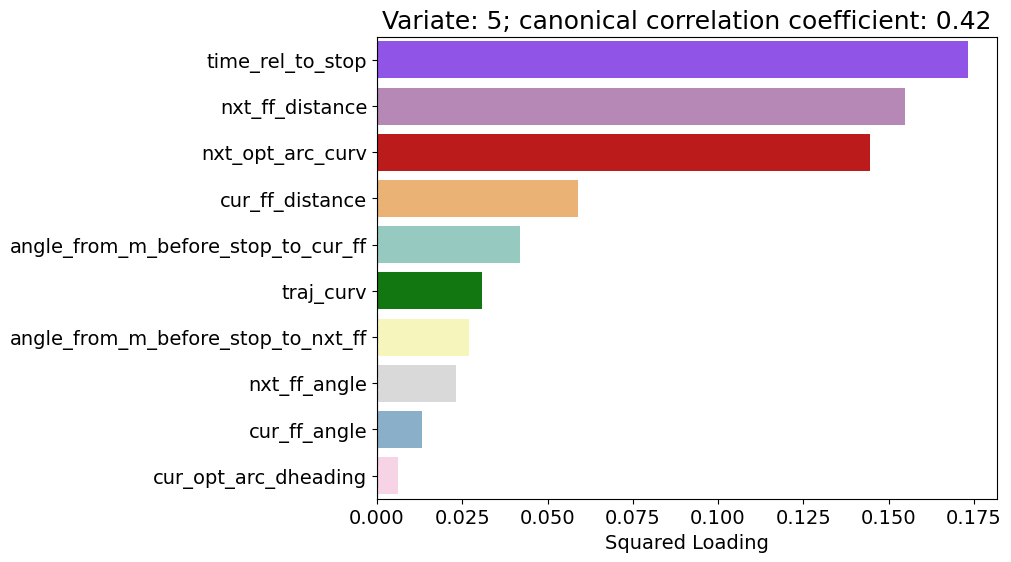

In [ ]:
cca_inst.plot_ranked_loadings(X1_or_X2='X2')

## abs weights ranked

### neurons

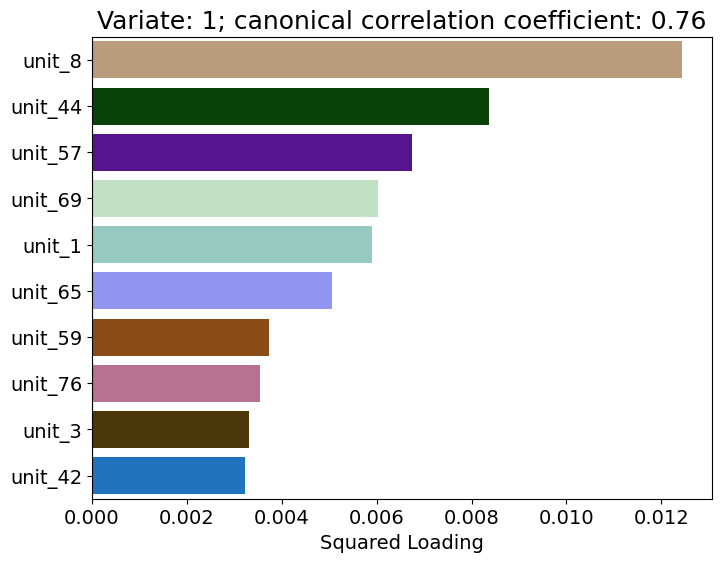

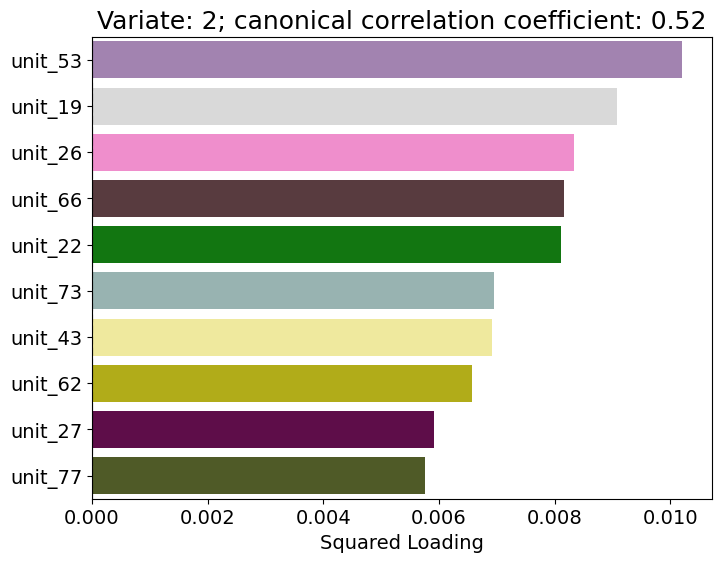

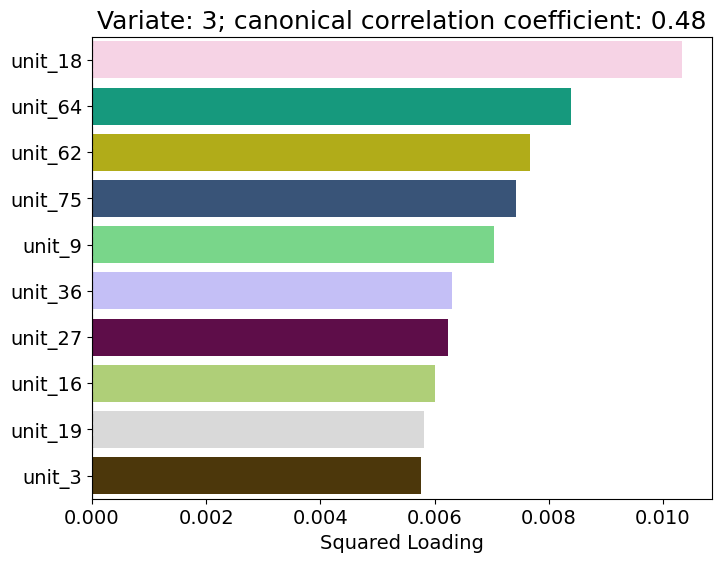

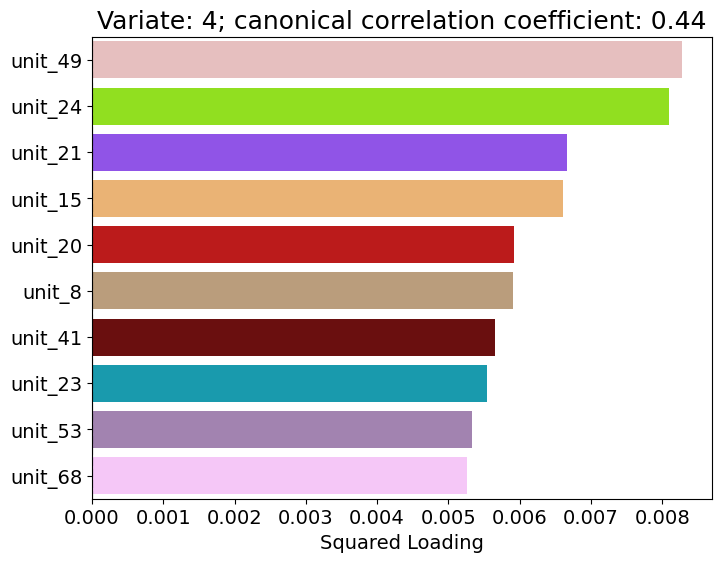

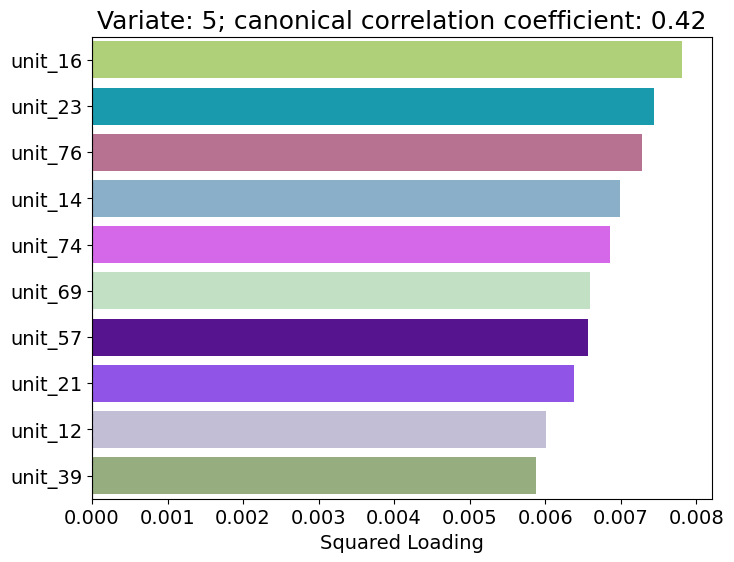

In [ ]:
cca_inst.plot_ranked_weights()

### behavior

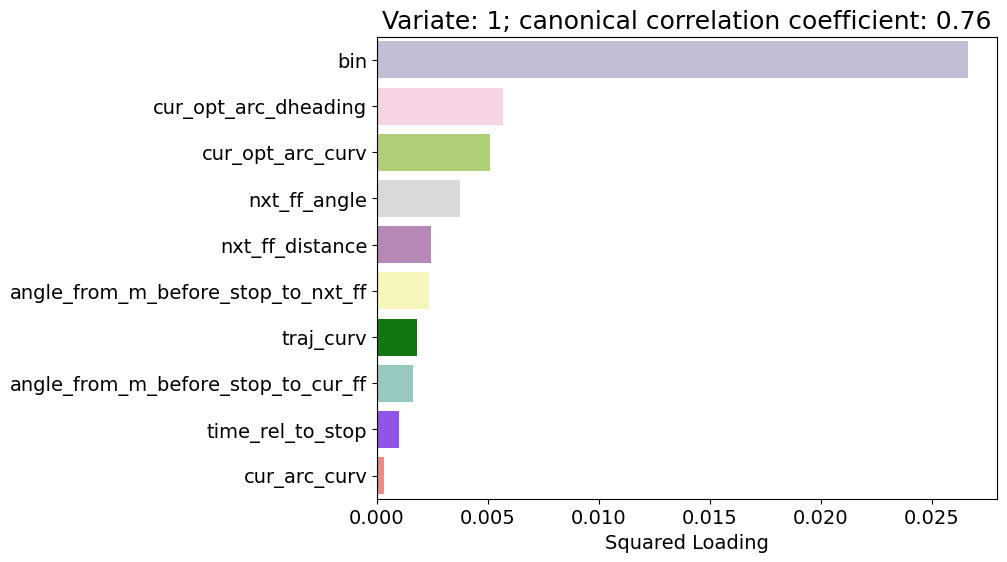

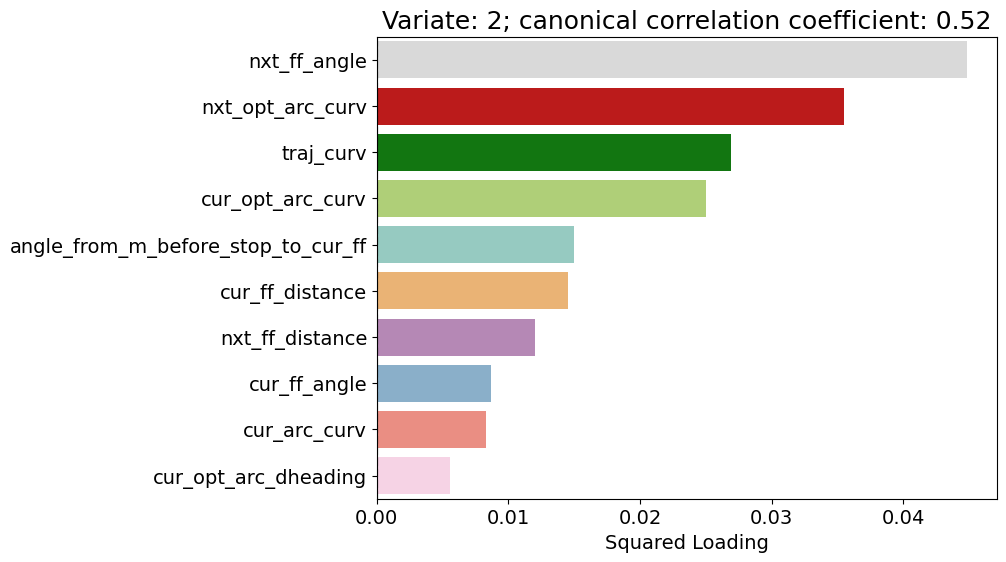

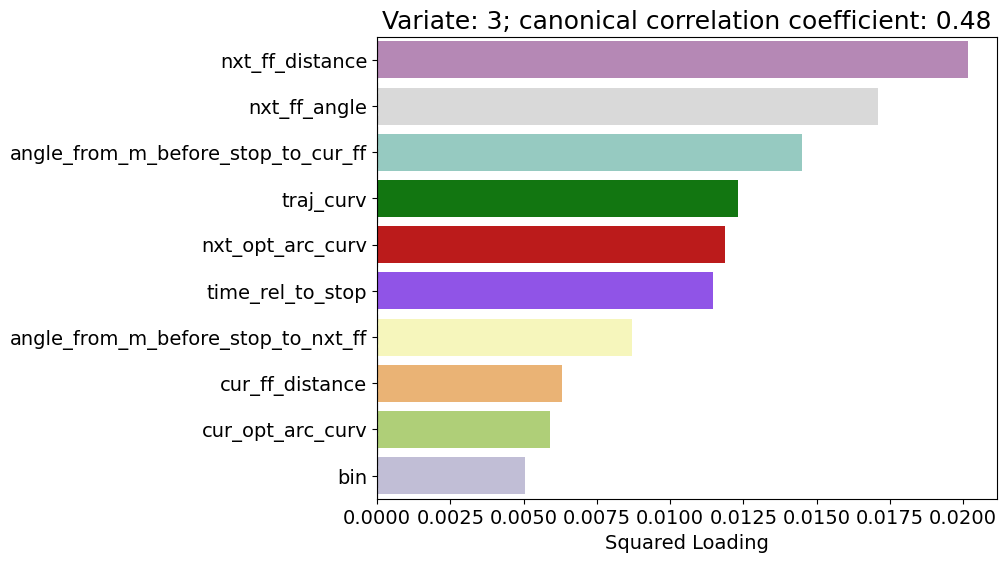

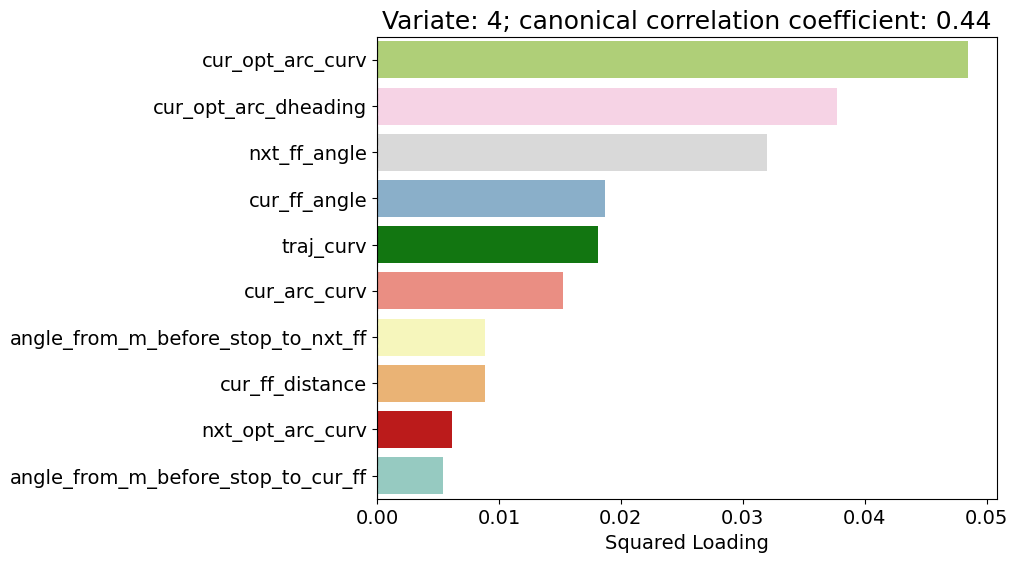

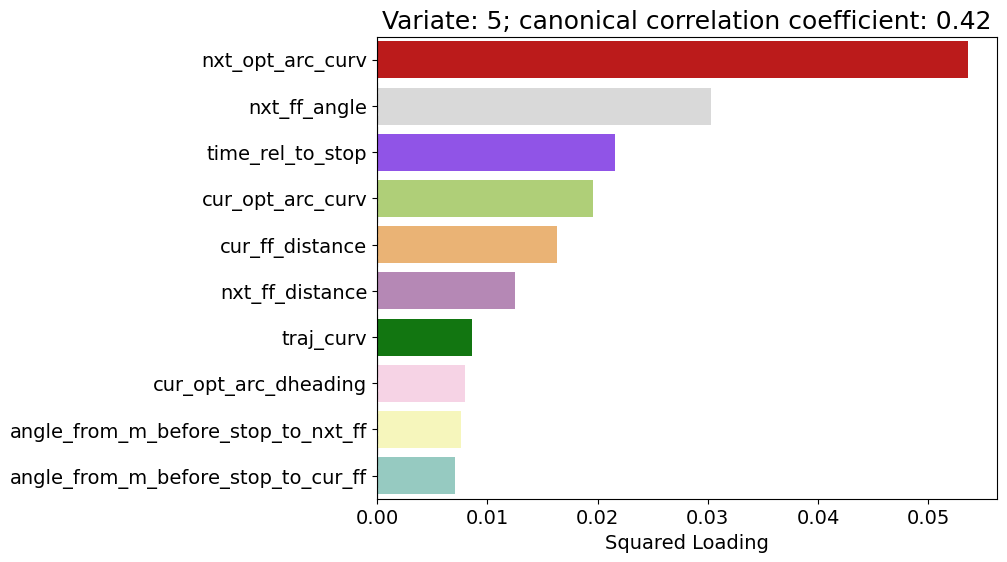

In [ ]:
cca_inst.plot_ranked_weights(X1_or_X2='X2')

## plot real weights

### neurons

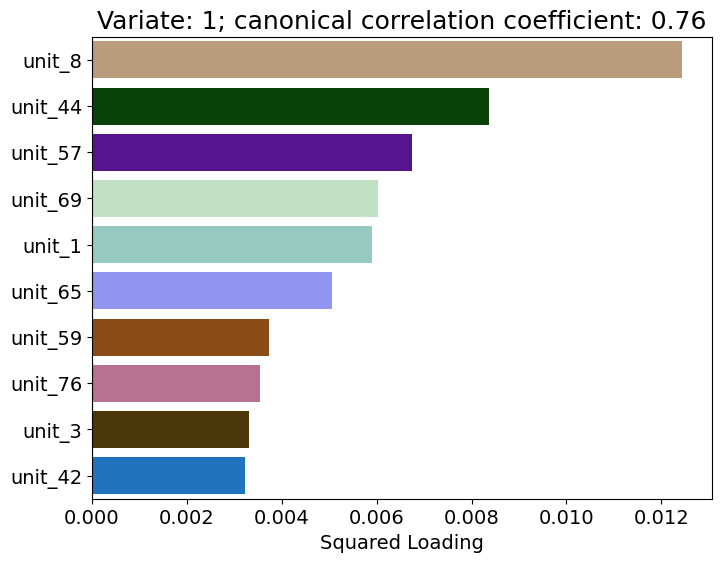

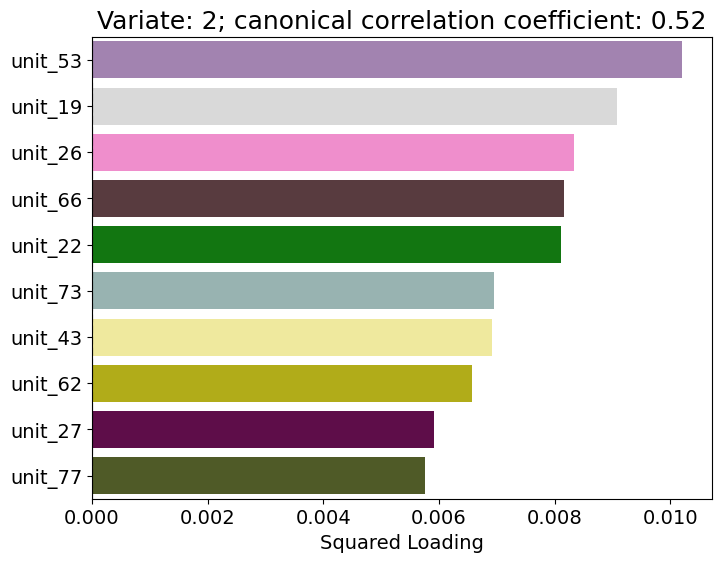

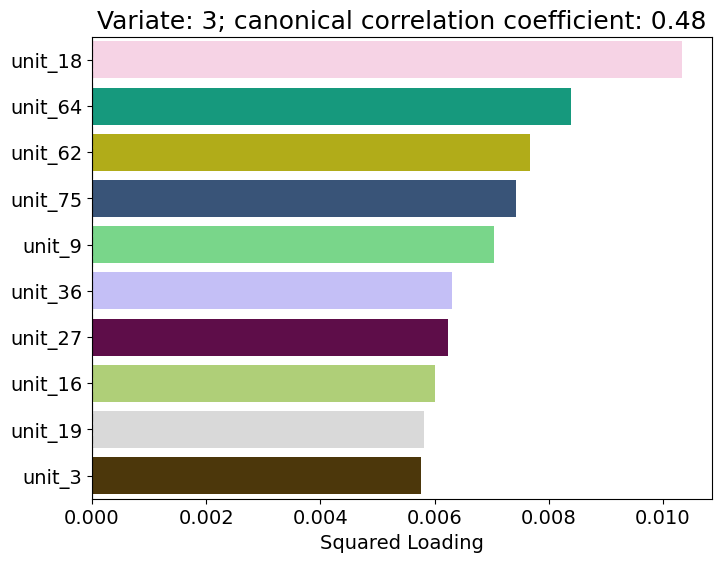

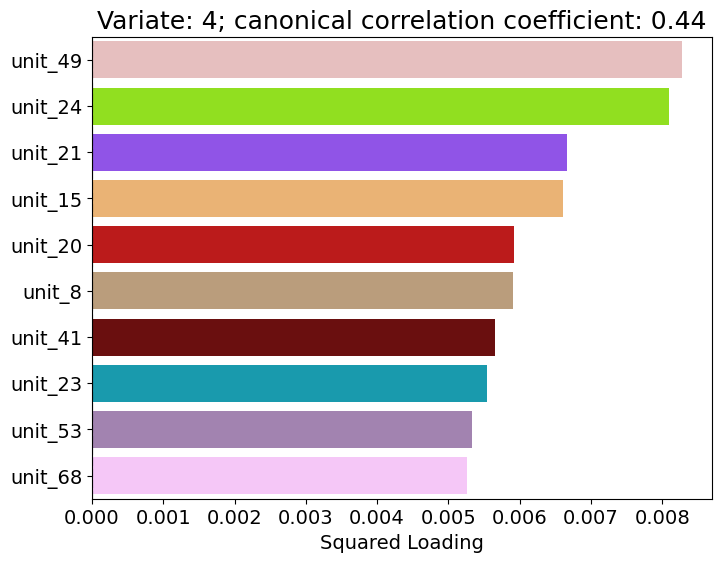

KeyboardInterrupt: 

In [ ]:
cca_inst.plot_ranked_weights(abs_value=False)

### behavior

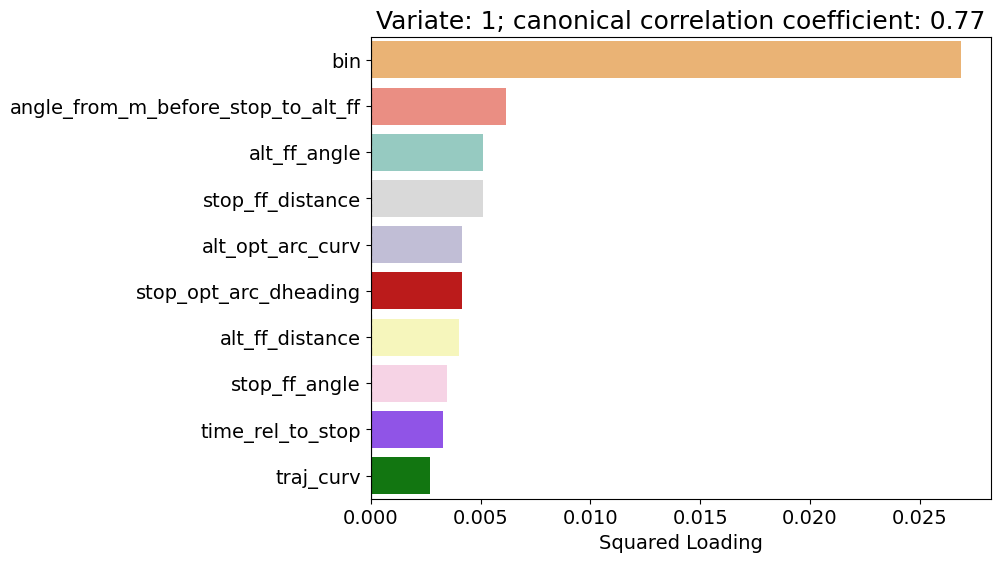

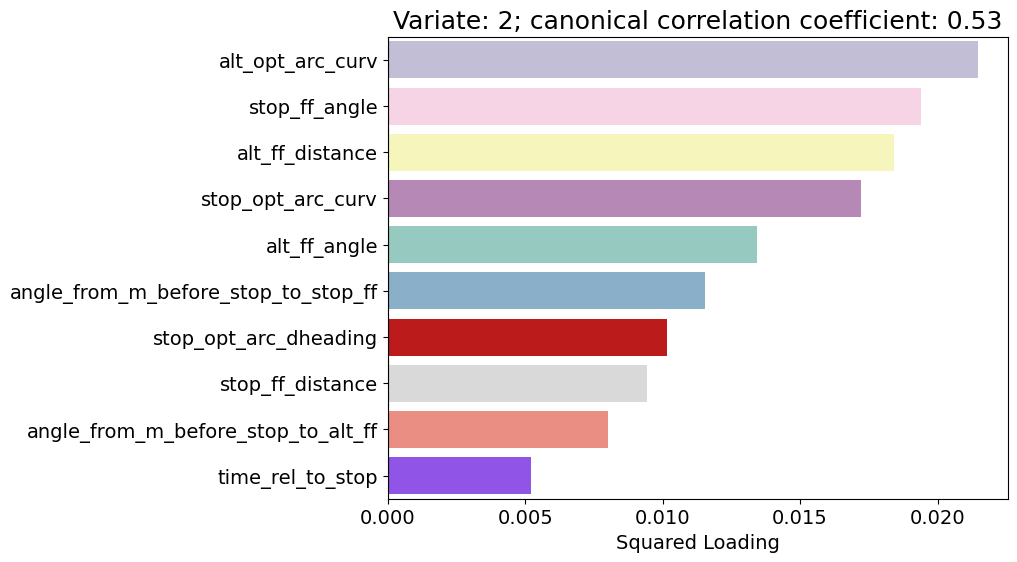

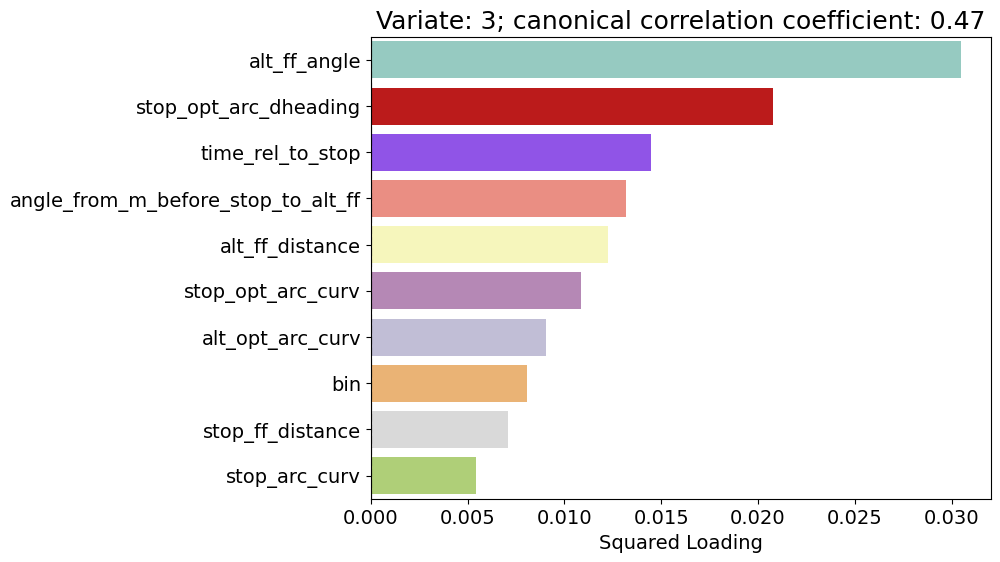

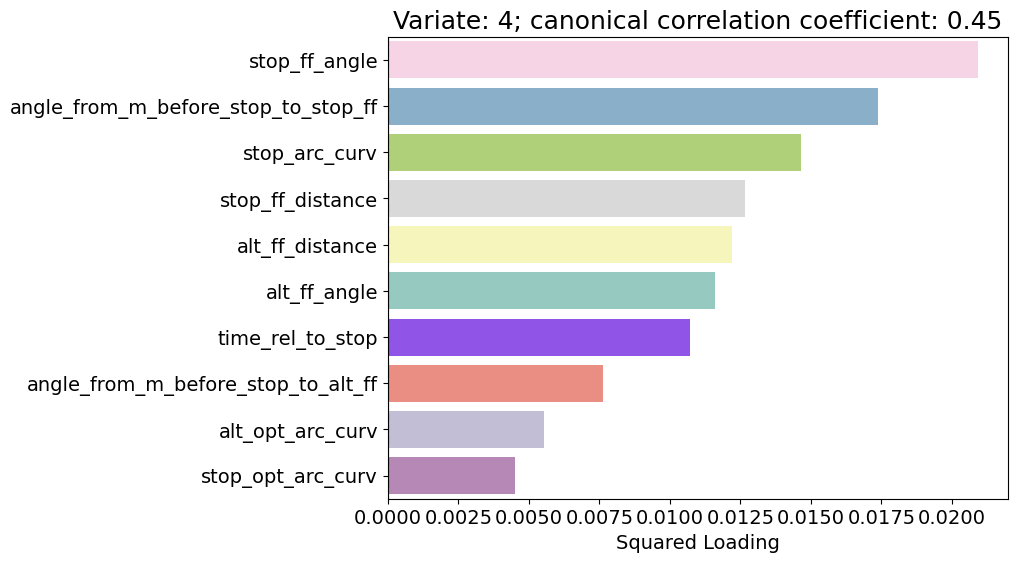

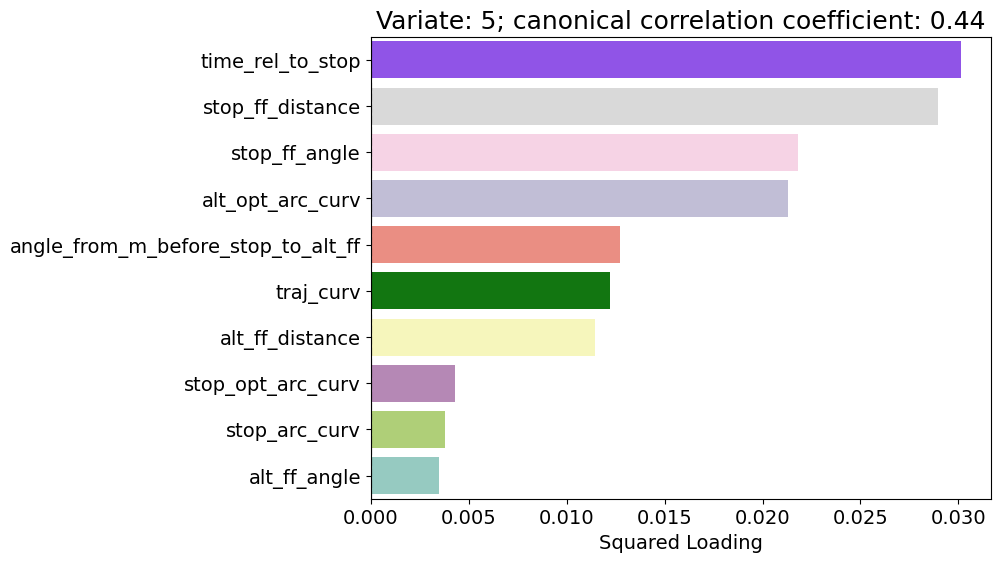

In [ ]:
cca_inst.plot_ranked_weights(X1_or_X2='X2', abs_value=False)

In [ ]:
stop here!

SyntaxError: invalid syntax (2745754519.py, line 1)

## distribution of each feature

In [ ]:
cca_inst.X2_sc.shape

(643, 13)

In [ ]:
X2_sc_df = pd.DataFrame(cca_inst.X2_sc, columns = cca_inst.X2.columns)
X2_sc_df.describe()

,nxt_ff_angle,nxt_ff_distance,alt_opt_arc_curv,time_rel_to_stop,traj_curv,cur_ff_angle,cur_ff_distance,cur_arc_curv,cur_opt_arc_curv,cur_opt_arc_dheading,bin,angle_from_m_before_stop_to_cur_ff,angle_from_m_before_stop_to_nxt_ff
count,643.00000,643.00000,643.00000,643.00000,643.00000,643.00000,643.00000,643.00000,643.00000,643.00000,643.00000,643.00000,643.00000
mean,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000
std,1.00078,1.00078,1.00078,1.00078,1.00078,1.00078,1.00078,1.00078,1.00078,1.00078,1.00078,1.00078,1.00078
min,-3.06447,-2.16544,-3.96562,-1.57732,-4.34350,-3.30498,-1.50602,-5.55899,-4.43541,-4.43994,-1.49796,-1.57970,-2.68969
25%,-0.59119,-0.70745,-0.55576,-0.83880,-0.54890,-0.49543,-0.89544,-0.24500,-0.41238,-0.21820,-0.92666,-0.91121,-0.50680
50%,-0.00339,-0.02846,0.02744,-0.07506,0.05584,0.02315,-0.09456,0.01361,0.03549,0.00683,-0.07230,-0.01794,0.00350
75%,0.55422,0.72042,0.59426,0.69499,0.57181,0.56417,0.78160,0.27760,0.42158,0.26639,0.91524,0.92376,0.66084
max,3.04556,2.89990,3.69564,3.08152,3.79653,3.51721,2.61942,6.79992,5.89334,4.41010,1.65778,1.72121,2.95743


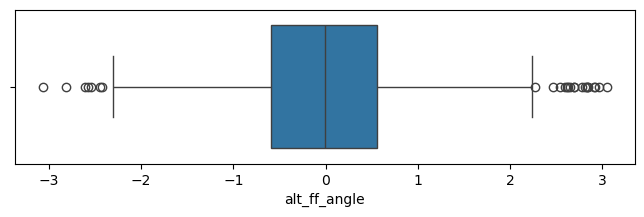

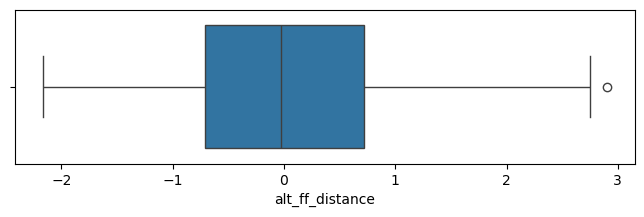

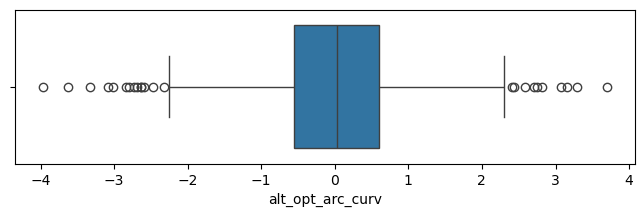

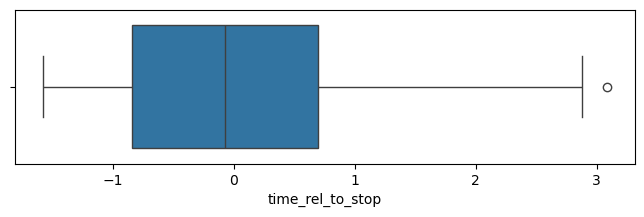

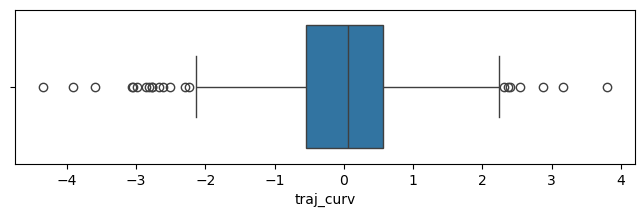

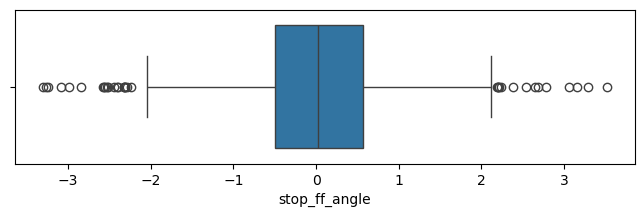

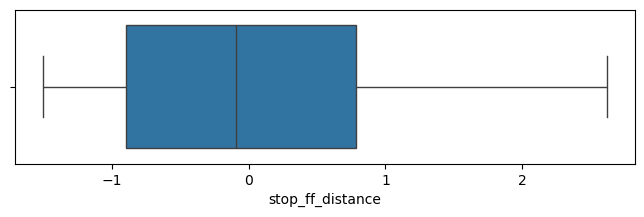

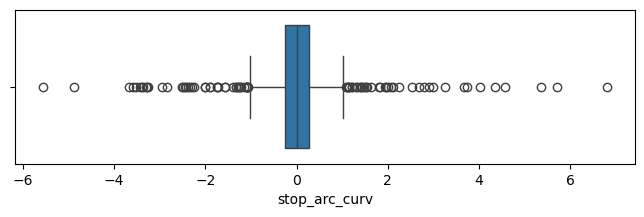

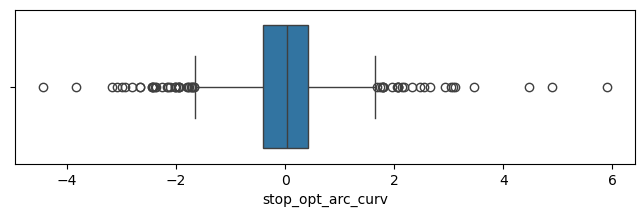

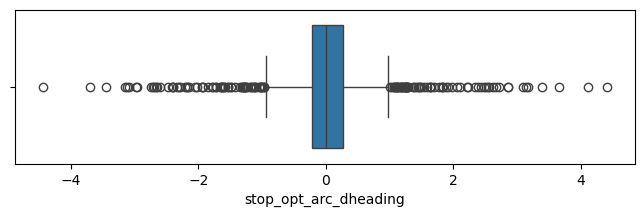

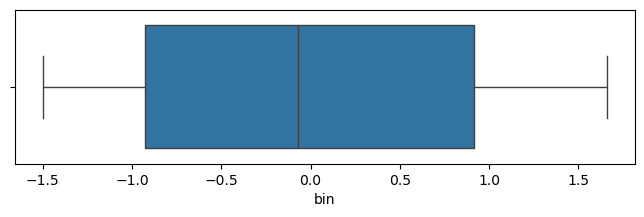

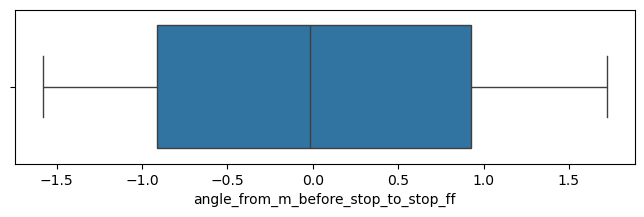

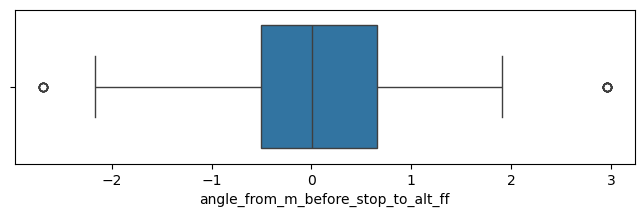

In [ ]:
for column in X2_sc_df.columns:
    plt.figure(figsize=(8, 2))
    sns.boxplot(X2_sc_df[column], orient='h')
    plt.show()
    

## heatmap of weights
raw canonical coefficients are interpreted in a manner analogous to interpreting regression coefficients. For example: a one unit increase in reading leads to a .0446 decrease in the first canonical variate of set 2 when all of the other variables are held constant (in some other data)

In [ ]:
weight_df = cca_inst.X2_weight_df.copy()
weight_df = weight_df.set_index('feature').drop(columns='feature_category')

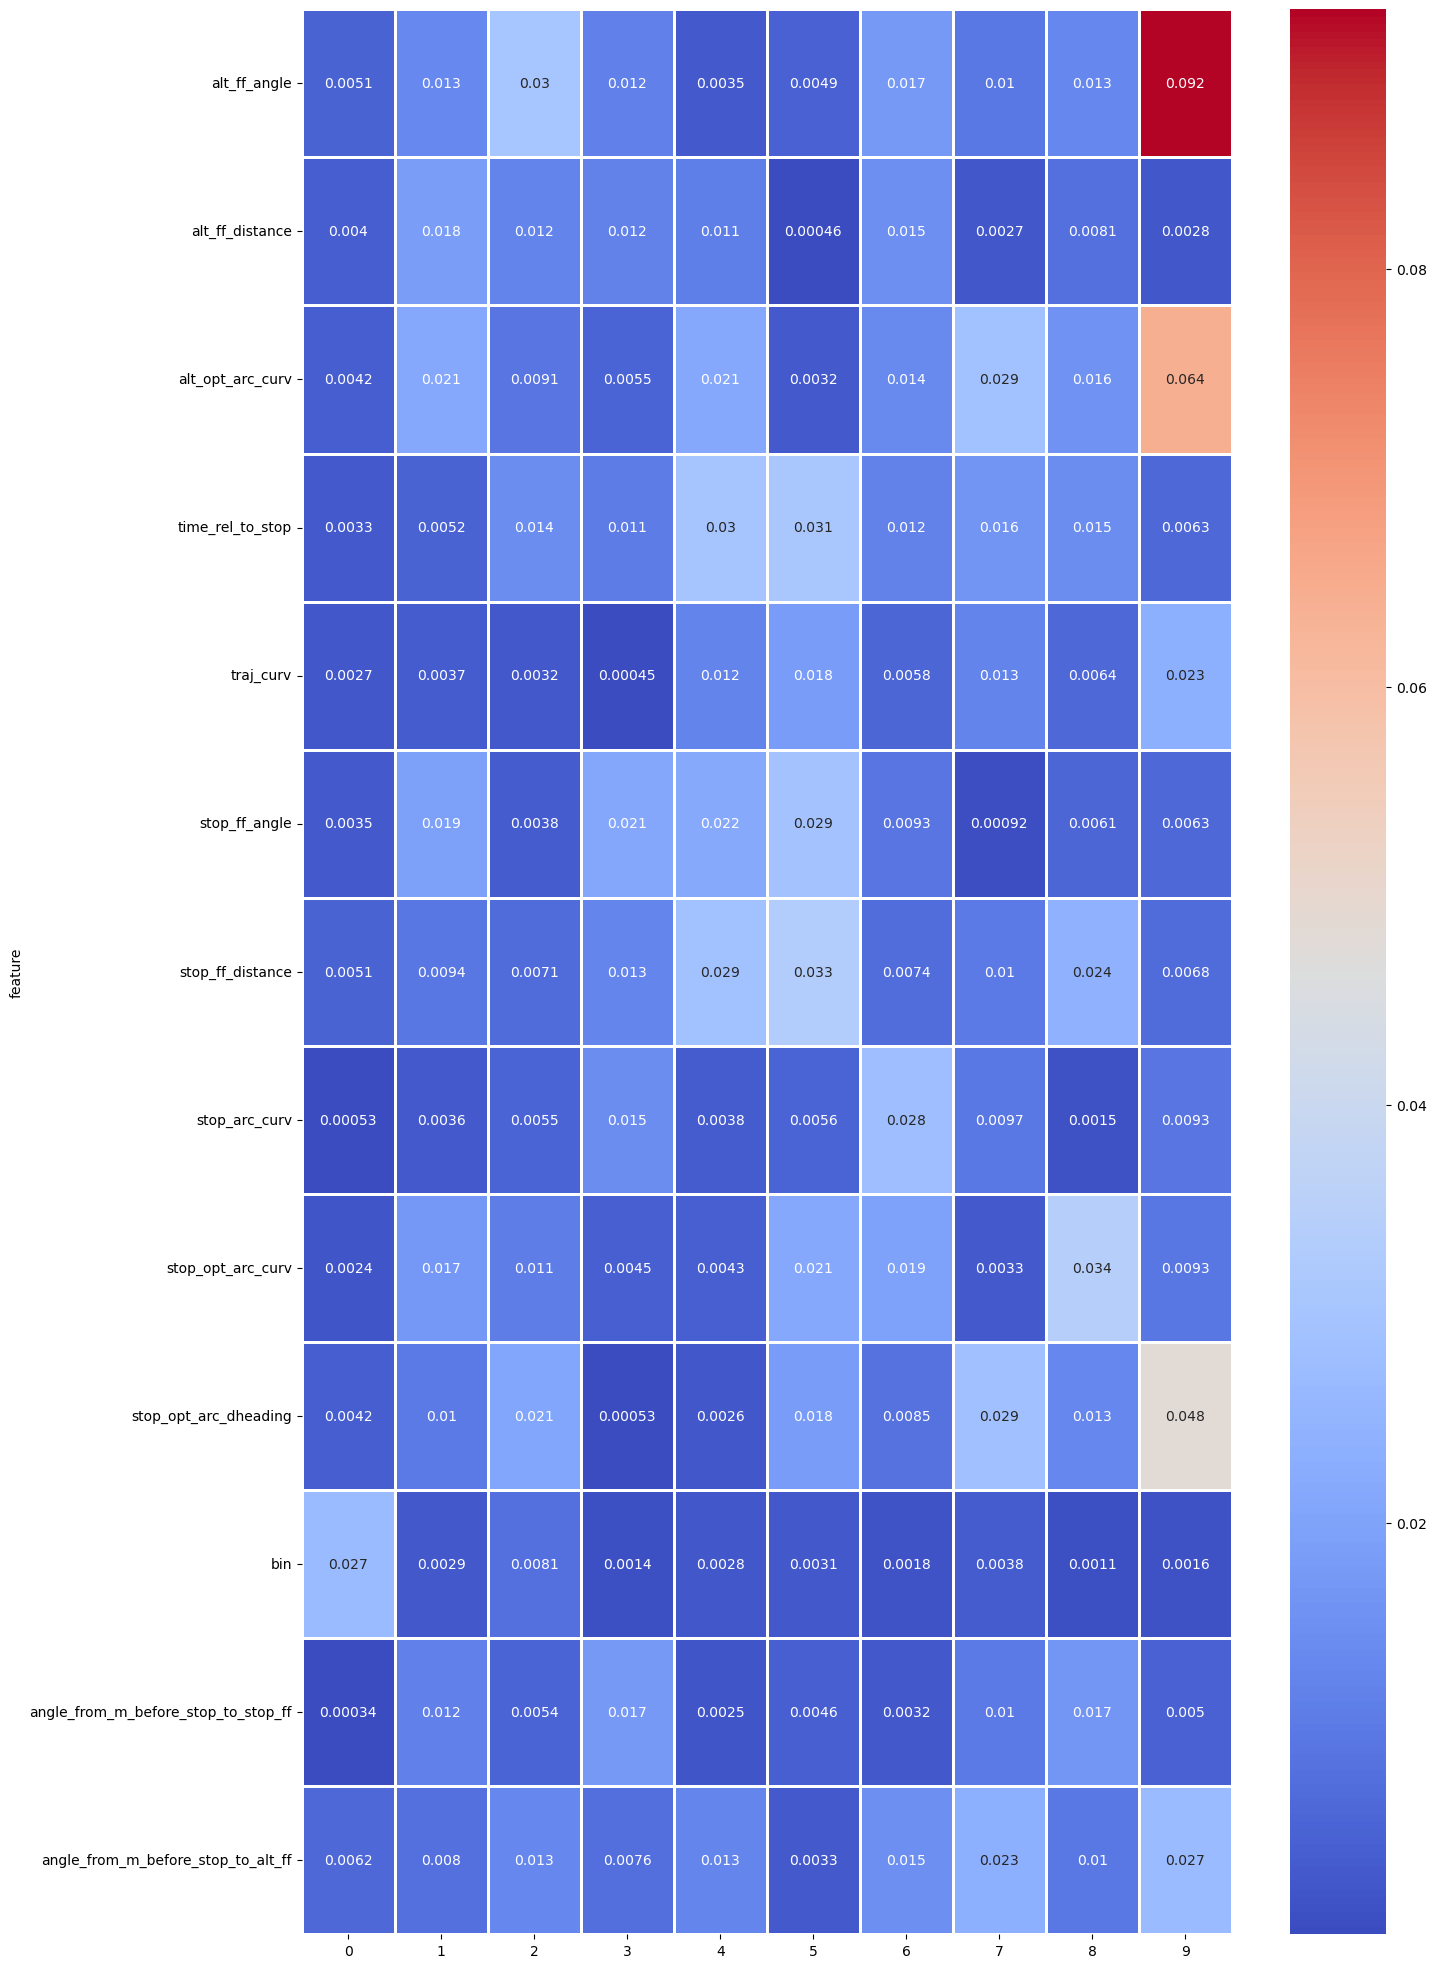

In [ ]:
plt.subplots(figsize=(15, 25))
sns.heatmap(weight_df.iloc[:20, :10], cmap='coolwarm', annot=True, linewidths=1)
plt.show()

## train test split

In [ ]:
train1, test1, train2, test2 = train_test_split(cca_inst.X1_sc, cca_inst.X2_sc, test_size=0.3, random_state=42)
# use training and testing set
nComponents = 10
cca2 = rcca.CCA(kernelcca = False, reg = 0., numCC = nComponents)
cca2.train([train1, train2])
testcorrs = cca2.validate([test1, test2])
testcorrs

Training CCA, kernel = None, regularization = 0.0000, 10 components


[array([ 0.16601,  0.27052, -0.04265,  0.21392,  0.07385,  0.04497,
         0.06918,  0.18854,  0.3288 , -0.04117,  0.10374,  0.41179,
         0.18181,  0.07008,  0.41278,  0.12765,  0.23815,  0.30137,
         0.13773,  0.32709,  0.40904,  0.42835,  0.36056,  0.16633,
         0.09906,  0.1593 ,  0.15809,  0.18762,  0.26092,  0.07841,
         0.1701 , -0.03962,  0.1092 ,  0.22486,  0.17081,  0.10919,
        -0.00575,  0.07872,  0.12964,  0.06004,  0.09885,  0.16676,
         0.24769,  0.14249,  0.45882,  0.14811,  0.45575, -0.00484,
         0.29337,  0.18232,  0.31452,  0.21348, -0.08977,  0.17961,
         0.06483,  0.07506,  0.1021 ,  0.19136,  0.23868,  0.1411 ,
         0.20266,  0.04708,  0.15282,  0.16654,  0.2962 ,  0.30952,
         0.12753,  0.07337,  0.09376,  0.14056,  0.04767,  0.37859,
         0.33603,  0.14019,  0.20891,  0.57302,  0.06753,  0.18801,
         0.09678,  0.038  ,  0.09279,  0.20425,  0.17003, -0.17356,
         0.14512,  0.11225]),
 array([ 0.72085, 

## compute explained variance

In [ ]:
cca2.compute_ev([test1, test2])

Computing explained variance for component #1
Computing explained variance for component #2
Computing explained variance for component #3
Computing explained variance for component #4
Computing explained variance for component #5
Computing explained variance for component #6
Computing explained variance for component #7
Computing explained variance for component #8
Computing explained variance for component #9
Computing explained variance for component #10


[array([[0.29637, 0.47038, 0.0378 , 0.36736, 0.14814, 0.26158, 0.0574 ,
         0.40039, 0.35631, 0.09605, 0.20393, 0.39169, 0.25049, 0.30972,
         0.40985, 0.1003 , 0.35105, 0.37228, 0.29432, 0.28156, 0.42894,
         0.09537, 0.45769, 0.31349, 0.26853, 0.32976, 0.38649, 0.34388,
         0.43198, 0.20538, 0.28921, 0.0131 , 0.25439, 0.25955, 0.11433,
         0.24517, 0.19142, 0.36757, 0.44289, 0.06147, 0.40519, 0.26793,
         0.26298, 0.26871, 0.50794, 0.06231, 0.54603, 0.16127, 0.35585,
         0.34024, 0.34508, 0.34122, 0.09512, 0.42817, 0.27054, 0.17302,
         0.37314, 0.34602, 0.41733, 0.27742, 0.22038, 0.29469, 0.22737,
         0.27435, 0.482  , 0.39625, 0.28468, 0.3218 , 0.28524, 0.16089,
         0.3863 , 0.44471, 0.31012, 0.13947, 0.17785, 0.52656, 0.23378,
         0.28259, 0.29749, 0.03473, 0.33107, 0.37959, 0.24742, 0.1145 ,
         0.19848, 0.13219],
        [0.16685, 0.19671, 0.13099, 0.25375, 0.08233, 0.07183, 0.1471 ,
         0.0396 , 0.06539, 0.27389, 

## test for p values

In [ ]:
stats_cca = CanCorr(cca_inst.X1_sc, cca_inst.X2_sc)
print(stats_cca.corr_test().summary())
neural_data_modeling.print_weights('X', stats_cca.x_cancoef)
neural_data_modeling.print_weights('Z', stats_cca.y_cancoef)

                              Cancorr results
   Canonical Correlation Wilks' lambda   Num DF     Den DF   F Value Pr > F
---------------------------------------------------------------------------
0                 0.8285        0.0208 3698.0000 547860.8057 15.6925 0.0000
1                 0.6838        0.0663 3570.0000 536405.3663 11.2254 0.0000
2                 0.6092        0.1245 3444.0000 524911.9670  8.8637 0.0000
3                 0.5047        0.1980 3320.0000 513379.2826  7.1067 0.0000
4                 0.4896        0.2656 3198.0000 501805.9337  6.0168 0.0000
5                 0.4324        0.3494 3078.0000 490190.4845  4.9415 0.0000
6                 0.4096        0.4297 2960.0000 478531.4418  4.1163 0.0000
7                 0.3536        0.5163 2844.0000 466827.2525  3.3447 0.0000
8                 0.3113        0.5901 2730.0000 455076.3024  2.7753 0.0000
9                 0.2571        0.6534 2618.0000 443276.9151  2.3315 0.0000
10                0.2159        0.6997 250

# PGAM (unfinished)

In [ ]:
## Categorize variables
data_item.y_var.columns
temporal_vars = ['time_rel_to_stop',
 'time_when_nxt_ff_first_seen_rel_to_stop',
 'time_when_cur_ff_first_seen_rel_to_stop',
 'time_when_nxt_ff_last_seen_rel_to_stop',
 'time_when_cur_ff_last_seen_rel_to_stop',
 ]

spatial_vars = [x for x in data_item.y_var.columns if x not in temporal_vars]
spatial_vars

# Appendix

## more columns (possibly get in the future)

get also get: (but to be honest, it doesn't make that much sense to get them....so let's skip for now.)
'distance traversed since target last visible',
'd angle since target last visible', 'target_at_right',
'time_till_capture', 'time from last visible to capture

Note that there might be multicollinearity. For example, duration from last visible to capture = time since target last visible + time till capture

Similarly, target angle = target angle last seen frozen - d angle since target last visible

(For distance it's not exactly the same because of the difference between distance and distance traversed, but it's still similar)

The multicollinearity is fine in linear regression (when each feature here is a y var), but need to be dealt with in cca.